### Prediction of Petrophysical Properties from Well Logs

### Objective

The primary objective of this project is to develop a machine learning data-driven model to estimate reservoir properties, including shale volume, porosity, and fluid saturation, based on a common set of well logs, including gamma-ray, bulk density, neutron porosity, resistivity, and sonic. 

#### Data Preparation

In [243]:
# import some relevant libraries to begin exploratory analysis of the dataset
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import sklearn
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None) #to see all available columns

### Exploratory Data Analysis

This is done to identify missing values, outliers, trends and anomalies within the data. The goal is to thoroughly understand the data in ordder to further proceed with the analysis. 


In [244]:
# import the training datasets
rawdata = pd.read_csv('Train.csv')
rawdata.head(20)

WELLNUM       DEPTH     DTC     DTS      BS    CALI     DEN    DENC  \
0         0  335.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
1         0  335.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
2         0  336.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
3         0  336.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
4         0  337.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
5         0  337.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
6         0  338.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
7         0  338.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
8         0  339.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
9         0  339.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
10        0  340.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
11        0  340.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
12        0  341.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
13        0  341.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
14        0  342.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
15        0  342.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
16        0  343.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
17        0  343.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
18        0  344.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
19        0  344.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   

         GR     NEU     PEF    RDEP    RMED     ROP    PHIF      SW     VSH  
0    5.3274 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
1    5.8235 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
2    6.5228 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
3    7.2285 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
4    9.5020 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
5   15.6696 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
6   17.9443 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
7   18.0740 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
8   18.2037 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
9   18.3334 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
10  18.4631 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
11  18.5928 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
12  18.7225 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
13  18.8462 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
14  18.9496 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
15  19.0458 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
16  19.1420 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
17  19.2382 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
18  19.3343 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
19  19.4305 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0

In [245]:
# Determine the matrix of the dataset
rawdata.shape

(318967, 17)

In [246]:
# Determine the name of the columns to be analyzed
rawdata.columns

Index(['WELLNUM', 'DEPTH', 'DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC', 'GR',
       'NEU', 'PEF', 'RDEP', 'RMED', 'ROP', 'PHIF', 'SW', 'VSH'],
      dtype='object')

In [247]:
# Determine the type of data each features have.
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318967 entries, 0 to 318966
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   WELLNUM  318967 non-null  int64  
 1   DEPTH    318967 non-null  float64
 2   DTC      318967 non-null  float64
 3   DTS      318967 non-null  float64
 4   BS       318967 non-null  float64
 5   CALI     318967 non-null  float64
 6   DEN      318967 non-null  float64
 7   DENC     318967 non-null  float64
 8   GR       318967 non-null  float64
 9   NEU      318967 non-null  float64
 10  PEF      318967 non-null  float64
 11  RDEP     318967 non-null  float64
 12  RMED     318967 non-null  float64
 13  ROP      318967 non-null  float64
 14  PHIF     318967 non-null  float64
 15  SW       318967 non-null  float64
 16  VSH      318967 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 41.4 MB


* WELLNUM - Well number
* DEPTH - Depth, unit in feet
* DTC - Compressional Travel-time, unit in nanosecond per foot
* DTS - Shear Travel-time, unit in microseconds per foot
* BS - Bit size, unit in inch
* CAL - Caliper, unit in Inc
* DEN - Density, unit in Gram per cubic centimeter
* DENC - Corrected density, unit in Gram per cubic centimeter
* GR - Gamma Ray, unit in API
* NEU - Neutron, unit in dec
* PEF - Photo-electric Factor, unit in barns/e
* RDEP - Deep Resistivity, unit in Ohm.m
* RMED - Medium Resistivity, unit in Ohm.m
* ROP - Rate of penetration, unit in meters per hour
* PHIF - Porosity, a unit equals to the percentage of pore space in a unit volume of rock.
* SW - Water saturation
* VSH - Shale Volume

There are no categorical data types in the dataset; All data are float or int type (i.e. numerical data)
Lets further explore

In [248]:
# View statistical description of dataset
rawdata.describe()

WELLNUM          DEPTH            DTC            DTS  \
count  318967.000000  318967.000000  318967.000000  318967.000000   
mean        4.081012    6998.179996   -7791.051225   -8605.136709   
std         2.462805    3797.936862    4168.057493    3491.479107   
min         0.000000     335.160105   -9999.000000   -9999.000000   
25%         2.000000    3757.874000   -9999.000000   -9999.000000   
50%         4.000000    6905.184000   -9999.000000   -9999.000000   
75%         6.000000   10052.490000   -9999.000000   -9999.000000   
max         8.000000   15651.580000     181.813900     388.839700   

                  BS           CALI            DEN           DENC  \
count  318967.000000  318967.000000  318967.000000  318967.000000   
mean     -958.267420   -6982.041578   -7000.762197   -7205.371313   
std      2969.159669    4592.475975    4582.288708    4486.572798   
min     -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%         8.500000   -9999.000000   -9999.000000   -9999.000000   
50%        17.500000   -9999.000000   -9999.000000   -9999.000000   
75%        26.000000       8.556900       2.246500       0.030300   
max        36.000000      20.330400       3.089600       0.334158   

                  GR            NEU            PEF           RDEP  \
count  318967.000000  318967.000000  318967.000000  318967.000000   
mean      -43.026647   -7007.119486   -7221.969013    -949.836141   
std       990.102434    4578.760758    4480.143550    2944.074718   
min     -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%        23.330000   -9999.000000   -9999.000000       0.648200   
50%        55.508400   -9999.000000   -9999.000000       1.102400   
75%        78.978000       0.085100       0.058400       2.020650   
max      1124.440000       1.463474      13.840700   80266.800000   

                RMED            ROP           PHIF             SW  \
count  318967.000000  318967.000000  318967.000000  318967.000000   
mean     -804.023955    -989.366887   -8515.777016   -8515.693410   
std      4177.156020    3028.429856    3554.017382    3554.217716   
min     -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%         0.669800      15.197600   -9999.000000   -9999.000000   
50%         1.146000      24.969900   -9999.000000   -9999.000000   
75%         2.154900      30.633700   -9999.000000   -9999.000000   
max     97543.400000     208.633000       0.403294       1.000000   

                 VSH  
count  318967.000000  
mean    -8585.158486  
std      3484.038870  
min     -9999.000000  
25%     -9999.000000  
50%     -9999.000000  
75%     -9999.000000  
max         3.654300

#-9999 was present in most of the column data
lets visualize the raw data set. 

Log Plot 

In [249]:
neu= rawdata['NEU']
rdep =rawdata['RDEP']
gr = rawdata['GR']
den = rawdata['DEN']
pef= rawdata['PEF']
dtc= rawdata['DTC']
dts= rawdata['DTS']
bs= rawdata['BS']
cali= rawdata['CALI']
denc= rawdata['DENC']
rmed= rawdata['RMED']
rop= rawdata['ROP']
phif= rawdata['PHIF']
sw= rawdata['SW']
vsh= rawdata['VSH']
depth= rawdata['DEPTH']

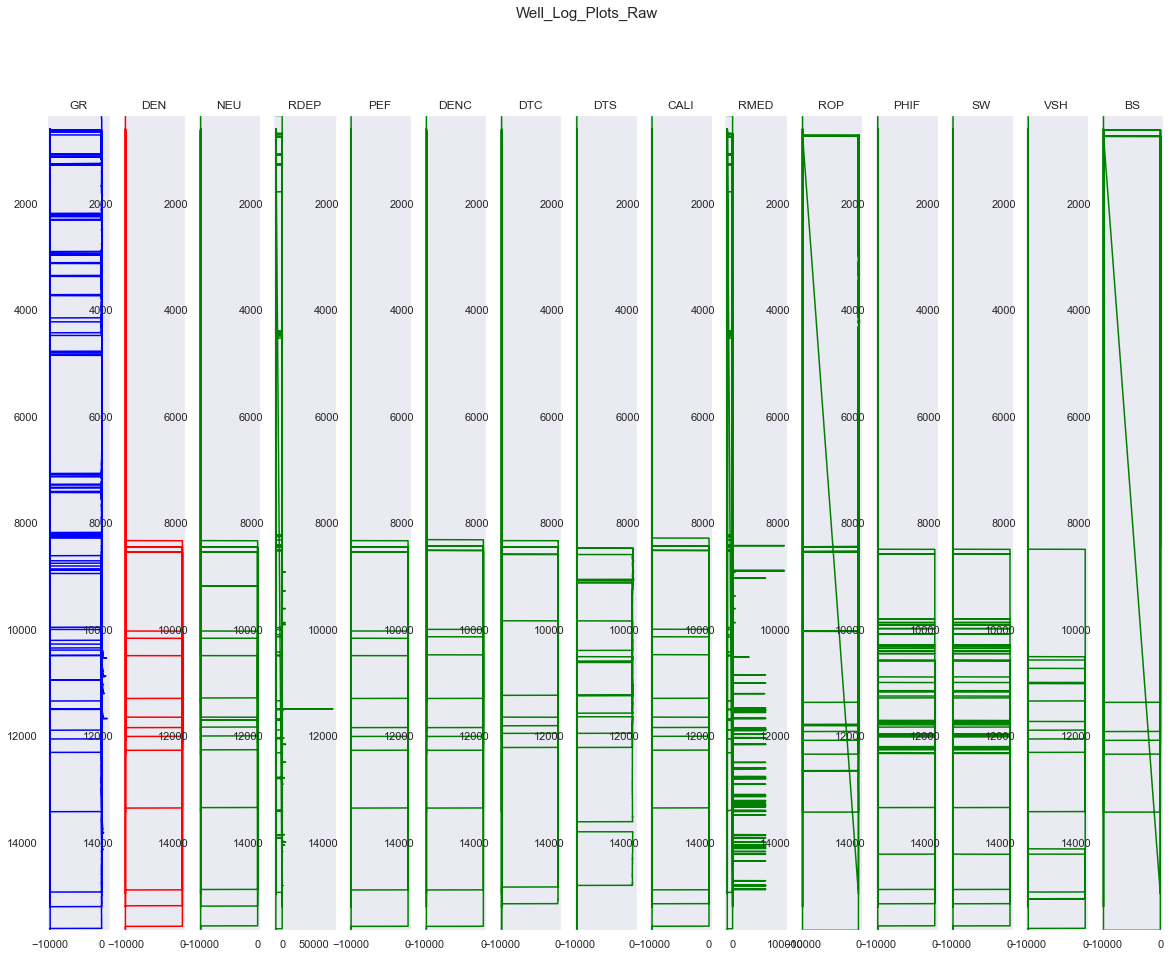

In [250]:
plt.figure(figsize=(20,15))

plt.suptitle('Well_Log_Plots_Raw', size=15)

plt.subplot(1,15,1)
plt.plot(gr, depth, color='blue')
plt.ylim(max(depth), min(depth))
plt.title('GR')
plt.grid()

plt.subplot(1,15,2)
plt.plot(den, depth, color='red')
plt.ylim(max(depth), min(depth))
plt.title('DEN')
plt.grid()

plt.subplot(1,15,3)
plt.plot(neu, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('NEU')
plt.grid()

plt.subplot(1,15,4)
plt.plot(rdep, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('RDEP')
plt.grid()

plt.subplot(1,15,5)
plt.plot(pef, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('PEF')
plt.grid()

plt.subplot(1,15,6)
plt.plot(denc, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('DENC')
plt.grid()

plt.subplot(1,15,7)
plt.plot(dtc, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('DTC')
plt.grid()

plt.subplot(1,15,8)
plt.plot(dts, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('DTS')
plt.grid()

plt.subplot(1,15,9)
plt.plot(cali, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('CALI')
plt.grid()

plt.subplot(1,15,10)
plt.plot(rmed, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('RMED')
plt.grid()

plt.subplot(1,15,11)
plt.plot(rop, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('ROP')
plt.grid()

plt.subplot(1,15,12)
plt.plot(phif, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('PHIF')
plt.grid()

plt.subplot(1,15,13)
plt.plot(sw, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('SW')
plt.grid()

plt.subplot(1,15,14)
plt.plot(vsh, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('VSH')
plt.grid()

plt.subplot(1,15,15)
plt.plot(bs, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('BS')
plt.grid()


# set space between logs
plt.tight_layout(4) 
plt.show()

1. Plot shows extremely large values and extremely small values. Possible presence of outliers 
2. Also besides gamma ray logs, no deflections were observed for depths from 0 to about 8000ft for the rest of the logs.
A possible explanation for this is the fact that log tools are usually deployed in pay zones which are usually a few 1000 feet from surface. We would assume that the actual well logging was started from depths beyond 8000ft. 

Let us further explore with boxplots

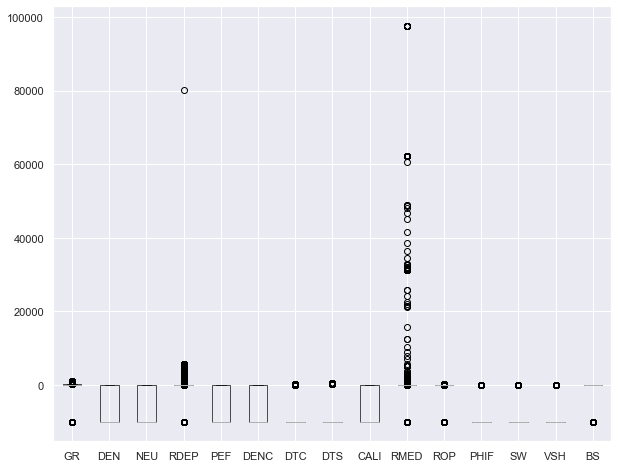

In [251]:
boxplot= rawdata.boxplot(column=['GR', 'DEN', 'NEU','RDEP','PEF','DENC','DTC','DTS','CALI','RMED','ROP','PHIF','SW','VSH','BS' ], figsize=(10,8))

#plt.figure(15,10)
#plt.show()

The simple box plots shows the following; 
1. A large number of negative values in all the log measurements, which does not auger well stemming from domain knowldehge of log values 
2. Significant number of outliers in RDEP, RMED, GR,DTC and DTS logs

Before cleaning the data and treating outliers, let us examine the distribution of the various columns in the given data

In [252]:
#sns.violinplot(x= rawdata['GR'],y= rawdata['DEPTH'], data = rawdata)

### Univariate Analysis

array([[<AxesSubplot:title={'center':'WELLNUM'}>,
        <AxesSubplot:title={'center':'DEPTH'}>,
        <AxesSubplot:title={'center':'DTC'}>,
        <AxesSubplot:title={'center':'DTS'}>],
       [<AxesSubplot:title={'center':'BS'}>,
        <AxesSubplot:title={'center':'CALI'}>,
        <AxesSubplot:title={'center':'DEN'}>,
        <AxesSubplot:title={'center':'DENC'}>],
       [<AxesSubplot:title={'center':'GR'}>,
        <AxesSubplot:title={'center':'NEU'}>,
        <AxesSubplot:title={'center':'PEF'}>,
        <AxesSubplot:title={'center':'RDEP'}>],
       [<AxesSubplot:title={'center':'RMED'}>,
        <AxesSubplot:title={'center':'ROP'}>,
        <AxesSubplot:title={'center':'PHIF'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'VSH'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

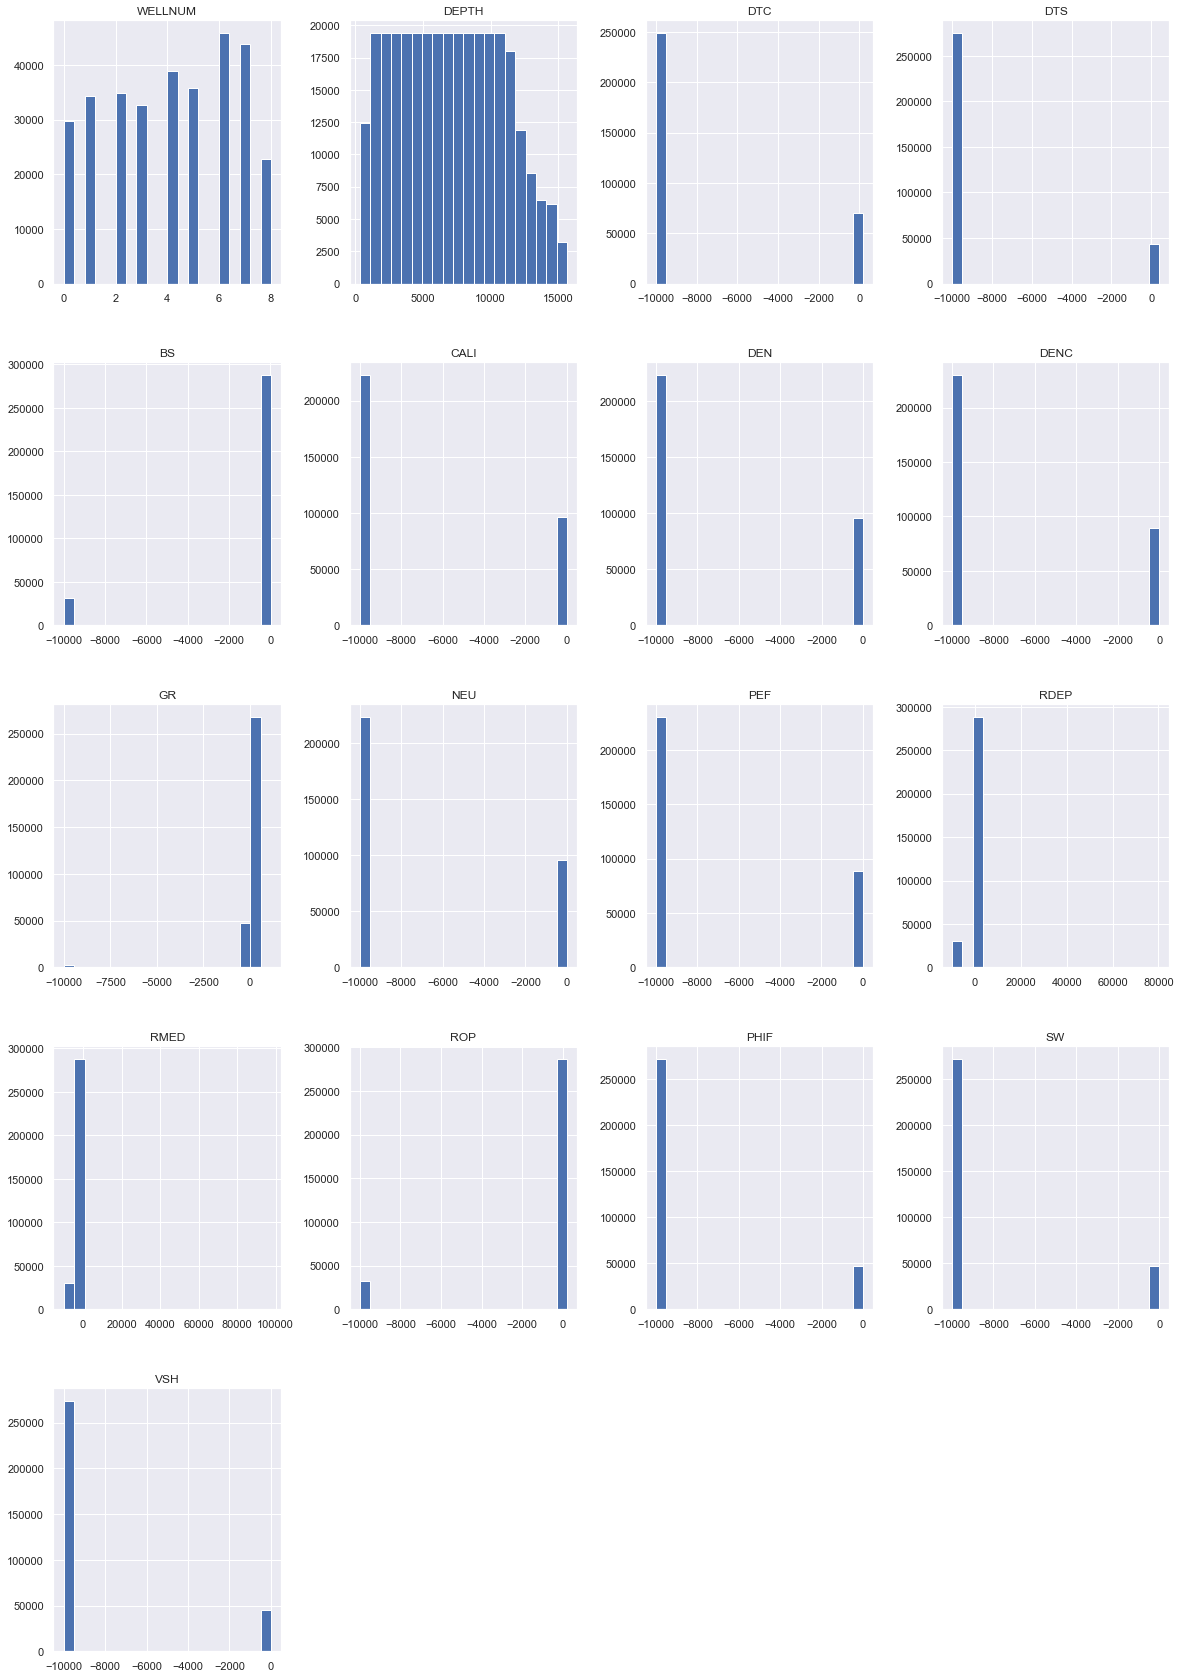

In [253]:
rawdata.hist(figsize = (20, 30), bins= 20)

### Let us discuss inference from the univariate analysis

1. Well number and well depth are uniformly distributed which is expected as well number is nominal. Also we expect more data to be collected at the depth of interest which in this case is around 5000 to 10000ft. 
2. DTC, DTS, CALI, DEN, DENC, BS, GR, NEU, PEF, RDEP, RMED, ROP, PHIF, SW AND VSH all show bimodality.
This means that two different distrubitions are present in the data. 
3. DTC,DTS, DEN, DENC, NEU, PEF and PHIF have a larger proportion of their distribution with average values of -999. This is unsual using domain knowledge as compression travel time, shear travel time, density and an neutron porosity logs do not usally provide such high negative values in oil and gas operations. 
Assumption: We would assume that this data was obtain from depths were the logging tools were not deployed and which are not of interest to the study. 

4. RDEP and RMED values have averages of -948 and -804 respectively which is unsual for conventional oil formations like the Volve field. Resistivity logs are usally presented on a logarithmic scale from 0.2 to 2000 Ohmm (https://glossary.oilfield.slb.com/en/terms/r/resistivity_log). 


### Basic Reservoir Engineering

1. Resistivity of resrvoir formation fluids is essential in determination of water saturation which is in turn used in estimating the hydrocarbon initially in place. 
This is usually done using the Archie's equation as shown below. The equation also shows that water saturation is related to porosity

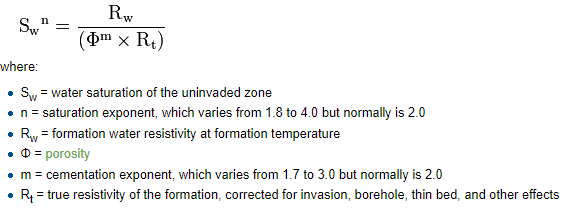

2. Sonic logs, bulk density logs and are aslo used in determining formation porosity and can be shown in the equations below

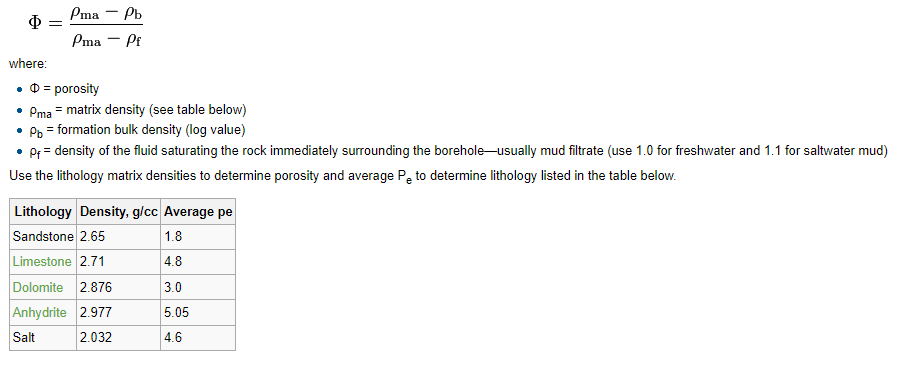

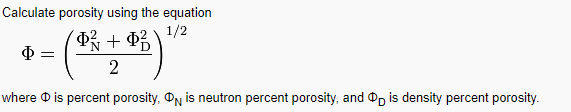

Before we do any form of data cleaning, let us determine if there are any correlations between the individual parameters in the data set

### Checking correlations between variables 

<AxesSubplot:>

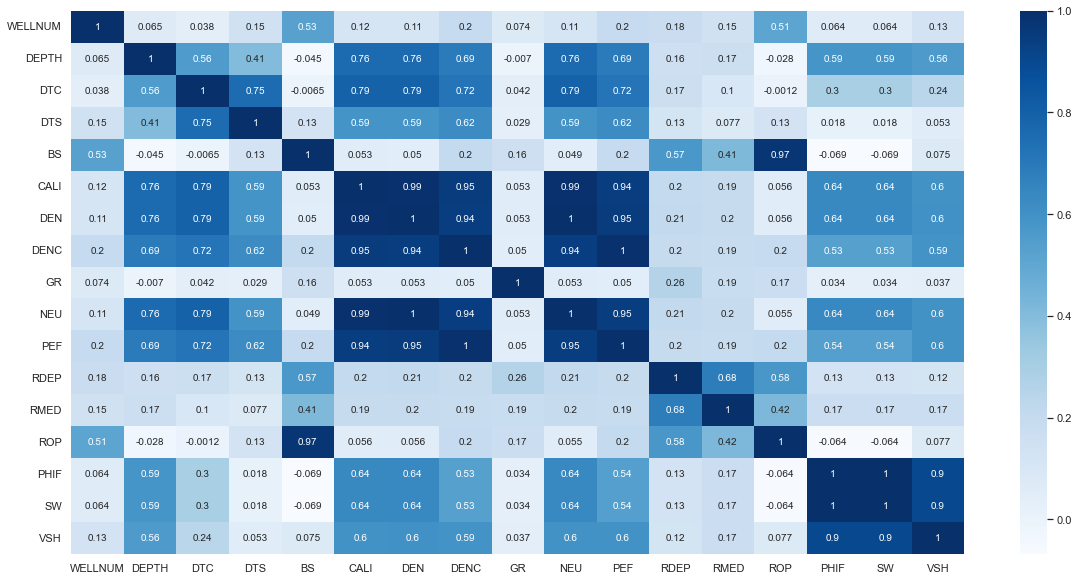

In [254]:
plt.figure(figsize=(20,10))
sns.heatmap(rawdata.corr(),cbar=True,annot=True,cmap='Blues')

Caveat: This correlations may be due to anomalies in the data. i.e. -999 values recorded.

### Positive Correlation 

1. PHIF---DEPTH, CALI, DEN, DENC, NEU, PEF, VSH, SW
2. SW---CALI, DEN, DENC, NEU, PEF, VSH
3. VSH---CALI, DTC, DEN, DENC, NEU, PEF, PHIF, SW

### Negative Correlation 

1. PHIF---BS,ROP
2. SW---BS, ROP

Due to the high level of suspected anomalies in the data, we would not look at collinearity at this stage.

Now let us clean up the data

In [255]:
rawdata.replace(['-9999', -9999], np.nan, inplace=True) # replacinhg all -999 values with nan

In [256]:
rawdata.head()

WELLNUM       DEPTH  DTC  DTS  BS  CALI  DEN  DENC      GR  NEU  PEF  RDEP  \
0        0  335.160105  NaN  NaN NaN   NaN  NaN   NaN  5.3274  NaN  NaN   NaN   
1        0  335.660105  NaN  NaN NaN   NaN  NaN   NaN  5.8235  NaN  NaN   NaN   
2        0  336.160105  NaN  NaN NaN   NaN  NaN   NaN  6.5228  NaN  NaN   NaN   
3        0  336.660105  NaN  NaN NaN   NaN  NaN   NaN  7.2285  NaN  NaN   NaN   
4        0  337.160105  NaN  NaN NaN   NaN  NaN   NaN  9.5020  NaN  NaN   NaN   

   RMED  ROP  PHIF  SW  VSH  
0   NaN  NaN   NaN NaN  NaN  
1   NaN  NaN   NaN NaN  NaN  
2   NaN  NaN   NaN NaN  NaN  
3   NaN  NaN   NaN NaN  NaN  
4   NaN  NaN   NaN NaN  NaN

In [257]:
rawdata.shape

(318967, 17)

In [258]:
rawdata.describe()

WELLNUM          DEPTH           DTC           DTS  \
count  318967.000000  318967.000000  69894.000000  43848.000000   
mean        4.081012    6998.179996     77.155278    140.490795   
std         2.462805    3797.936862     15.387921     36.085217   
min         0.000000     335.160105      1.025100     74.822400   
25%         2.000000    3757.874000     66.363775    119.019775   
50%         4.000000    6905.184000     72.396000    130.534100   
75%         6.000000   10052.490000     85.584000    144.340900   
max         8.000000   15651.580000    181.813900    388.839700   

                  BS          CALI           DEN          DENC             GR  \
count  287913.000000  96157.000000  95620.000000  89116.000000  315848.000000   
mean       16.856695      8.697590      2.452806      0.050244      55.288621   
std         7.071820      0.384869      0.156333      0.020949      38.602323   
min         8.500000      6.000000      1.626600     -0.982700       0.148800   
25%         8.500000      8.578100      2.311100      0.043900      24.329750   
50%        17.500000      8.625000      2.506800      0.053100      55.983000   
75%        26.000000      8.687500      2.576100      0.060600      79.240600   
max        36.000000     20.330400      3.089600      0.334158    1124.440000   

                NEU           PEF           RDEP           RMED  \
count  95439.000000  88536.000000  288519.000000  288753.000000   
mean       0.173838      5.757870       5.140624     158.102867   
std        0.095899      2.533365     168.911711    3082.521918   
min       -0.003400     -0.023200       0.065000       0.064900   
25%        0.106300      4.891800       0.743400       0.769700   
50%        0.156900      6.143150       1.208590       1.255200   
75%        0.218700      7.737325       2.183900       2.348500   
max        1.463474     13.840700   80266.800000   97543.400000   

                 ROP          PHIF            SW           VSH  
count  286588.000000  47314.000000  47314.000000  45100.000000  
mean       28.550509      0.137371      0.701001      0.307895  
std        18.161868      0.085265      0.350021      0.254315  
min         0.000000      0.000000      0.013000     -0.248000  
25%        19.451200      0.060000      0.336000      0.118375  
50%        25.916100      0.133000      0.933496      0.246509  
75%        32.220200      0.216000      1.000000      0.390100  
max       208.633000      0.403294      1.000000      3.654300

### The statistics of the data looking better.

Let us look at the missing data

In [259]:
rawdata.isna().sum()

WELLNUM         0
DEPTH           0
DTC        249073
DTS        275119
BS          31054
CALI       222810
DEN        223347
DENC       229851
GR           3119
NEU        223528
PEF        230431
RDEP        30448
RMED        30214
ROP         32379
PHIF       271653
SW         271653
VSH        273867
dtype: int64

Lets visualize the missing data

<AxesSubplot:>

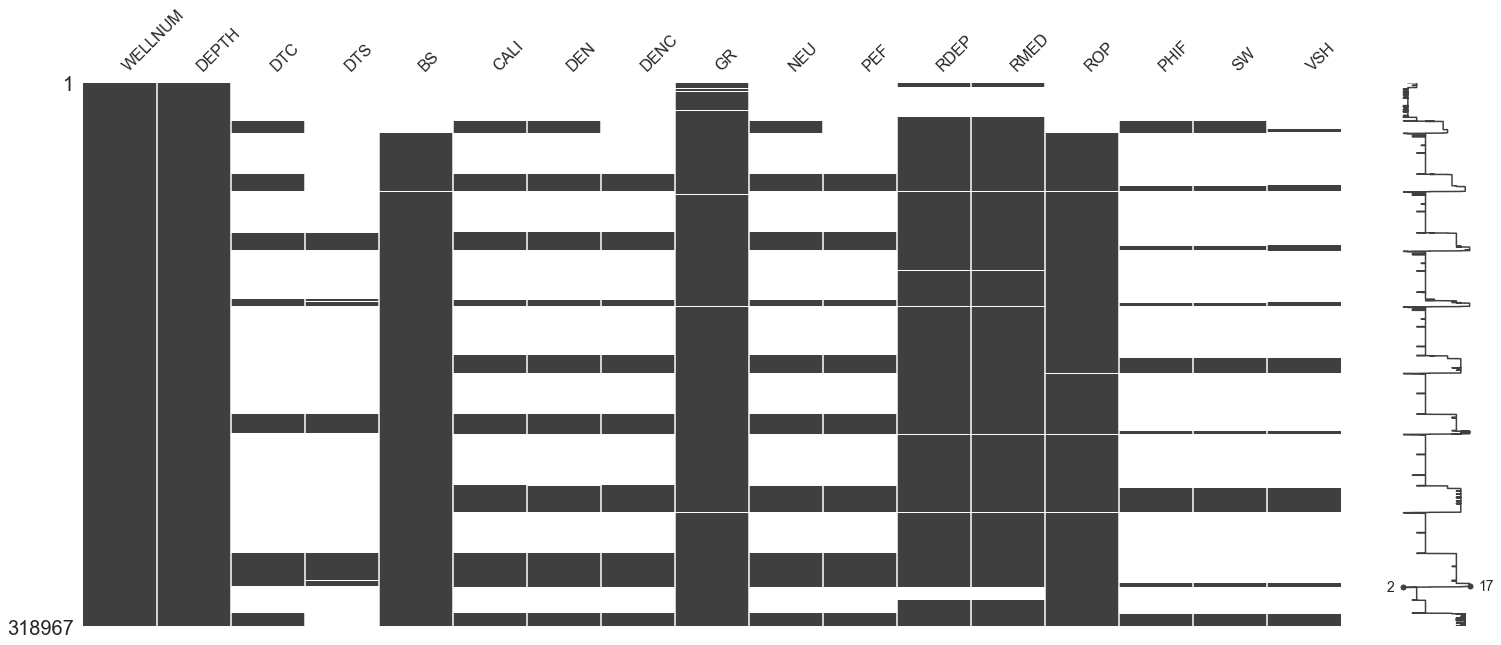

In [260]:
import missingno as msno
sns.set()
msno.matrix(rawdata)

<AxesSubplot:>

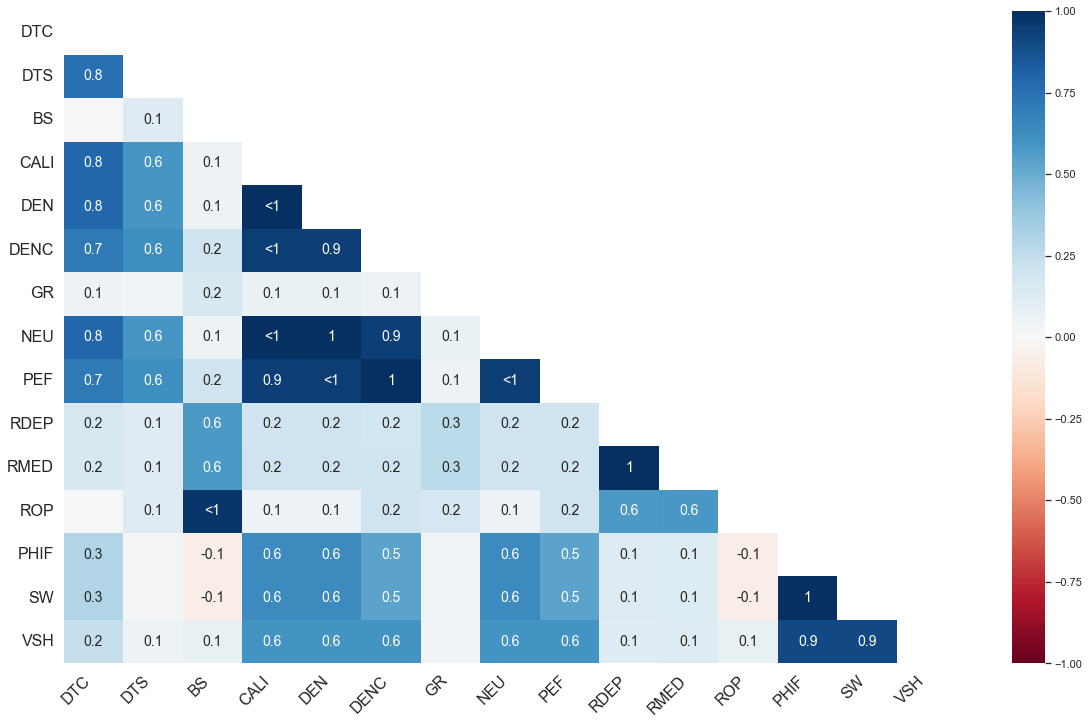

In [261]:
msno.heatmap(rawdata)

We have a significant number of missing values 

Let us see their percentage

In [262]:
# Determine the percentage of missing variables
total = rawdata.isnull().sum().sort_values(ascending=False)
percent = (rawdata.isnull().sum()/rawdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)

Total   Percent
DTS      275119  0.862531
VSH      273867  0.858606
PHIF     271653  0.851665
SW       271653  0.851665
DTC      249073  0.780874
PEF      230431  0.722429
DENC     229851  0.720611
NEU      223528  0.700787
DEN      223347  0.700220
CALI     222810  0.698536
ROP       32379  0.101512
BS        31054  0.097358
RDEP      30448  0.095458
RMED      30214  0.094725
GR         3119  0.009778
DEPTH         0  0.000000
WELLNUM       0  0.000000

**Comments**

From the above, we can see that DTS, VSH, PHIF, SW, DTC, DENC, PEF, NEU, DEN and CALI have a great amount of missing values. Hence, we need to consider domain knowledge and dropping of irrelevant columns or columns with little or no relationship with the target label. 

First let us drop all missing values in the tagret variables

Let us create a new dataset

In [263]:
rawdata1 = rawdata.copy(deep = True)

In [264]:
col_names =  ['PHIF', 'SW', 'VSH']
rawdata1.dropna(axis=0, subset=col_names, inplace=True)
rawdata1.shape

(42309, 17)

In [265]:
rawdata1.describe()

WELLNUM         DEPTH           DTC          DTS       BS  \
count  42309.000000  42309.000000  19314.000000  7198.000000  40429.0   
mean       4.985866  12245.593757     76.710857   131.021627      8.5   
std        2.268441   1604.293688     12.312749    14.551402      0.0   
min        0.000000   8494.000000      1.025100    74.822400      8.5   
25%        4.000000  11191.600000     68.909410   123.151225      8.5   
50%        6.000000  11910.110000     74.998850   131.898800      8.5   
75%        6.000000  13375.330000     83.715325   138.538250      8.5   
max        8.000000  15566.930000    123.253500   193.840200      8.5   

               CALI           DEN          DENC            GR           NEU  \
count  42309.000000  42309.000000  40429.000000  42309.000000  42306.000000   
mean       8.662651      2.411064      0.045937     39.888234      0.181612   
std        0.279134      0.160632      0.022609     24.822777      0.066775   
min        8.304600      1.626600     -0.487100      4.588597     -0.003400   
25%        8.556900      2.264400      0.034900     20.069900      0.144110   
50%        8.625000      2.419800      0.048200     35.799400      0.176400   
75%        8.671900      2.544000      0.060100     52.007100      0.215500   
max       11.904800      3.089600      0.257450    304.333700      0.862567   

                PEF          RDEP          RMED           ROP          PHIF  \
count  40429.000000  42075.000000  42309.000000  40332.000000  42309.000000   
mean       5.185693     25.199747   1029.768280     23.435488      0.141736   
std        1.715554    440.389867   7800.685663      7.759510      0.081144   
min       -0.013100      0.129500      0.139400      0.337400      0.000000   
25%        4.583000      1.475490      1.531300     18.803225      0.068437   
50%        5.414100      2.785300      3.327200     24.983250      0.141000   
75%        6.096800      9.129700     11.222060     29.914800      0.217000   
max       13.356600  80266.800000  62290.800000     46.895400      0.403294   

                 SW           VSH  
count  42309.000000  42309.000000  
mean       0.667124      0.275485  
std        0.354821      0.206619  
min        0.013000     -0.248000  
25%        0.297700      0.113500  
50%        0.808000      0.232600  
75%        1.000000      0.360400  
max        1.000000      2.460104

In [266]:
rawdata1.shape

(42309, 17)

In [267]:
# The shape of the data has significantly reduced

Let us check missing data in the new data set

In [268]:
rawdata1.isna().sum()

WELLNUM        0
DEPTH          0
DTC        22995
DTS        35111
BS          1880
CALI           0
DEN            0
DENC        1880
GR             0
NEU            3
PEF         1880
RDEP         234
RMED           0
ROP         1977
PHIF           0
SW             0
VSH            0
dtype: int64

<AxesSubplot:>

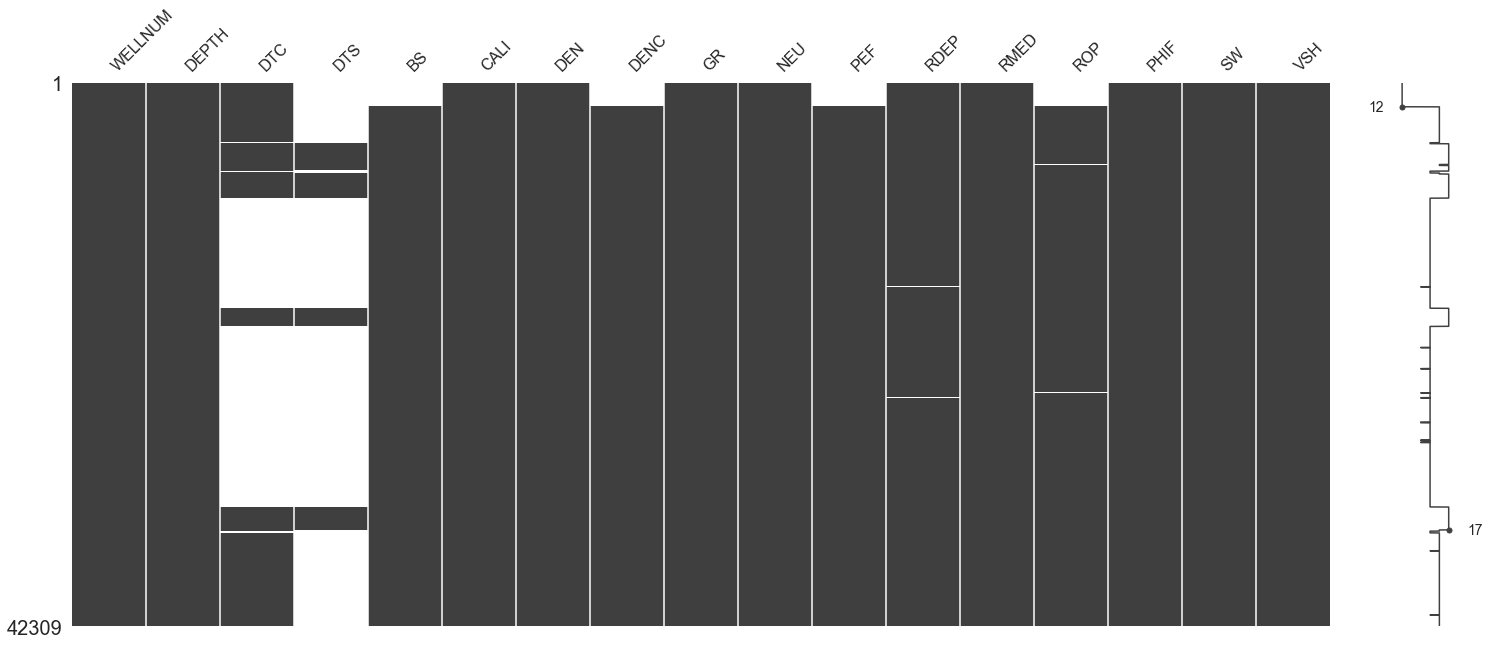

In [269]:
sns.set()
msno.matrix(rawdata1)

1. The number of missing values have reduced significantly.
2. There are however significant missing values in the compressional and shear travel times which are used in sonic porosity determination
3. to confirm this, let us heck and see if there is some form of correlation between these logs and the target variables.

In [270]:
#sns.set(style = 'ticks') # Set the background to dark
#sns.pairplot(rawdata1, vars=['DEPTH','GR', 'DTC','DTS' ,'DEN', 'DENC', 'PEF', 'RMED', 'ROP', 'CALI','NEU', 'RDEP', 'PHIF', 'SW', 'VSH'] ) # Create a matrix scatterplot

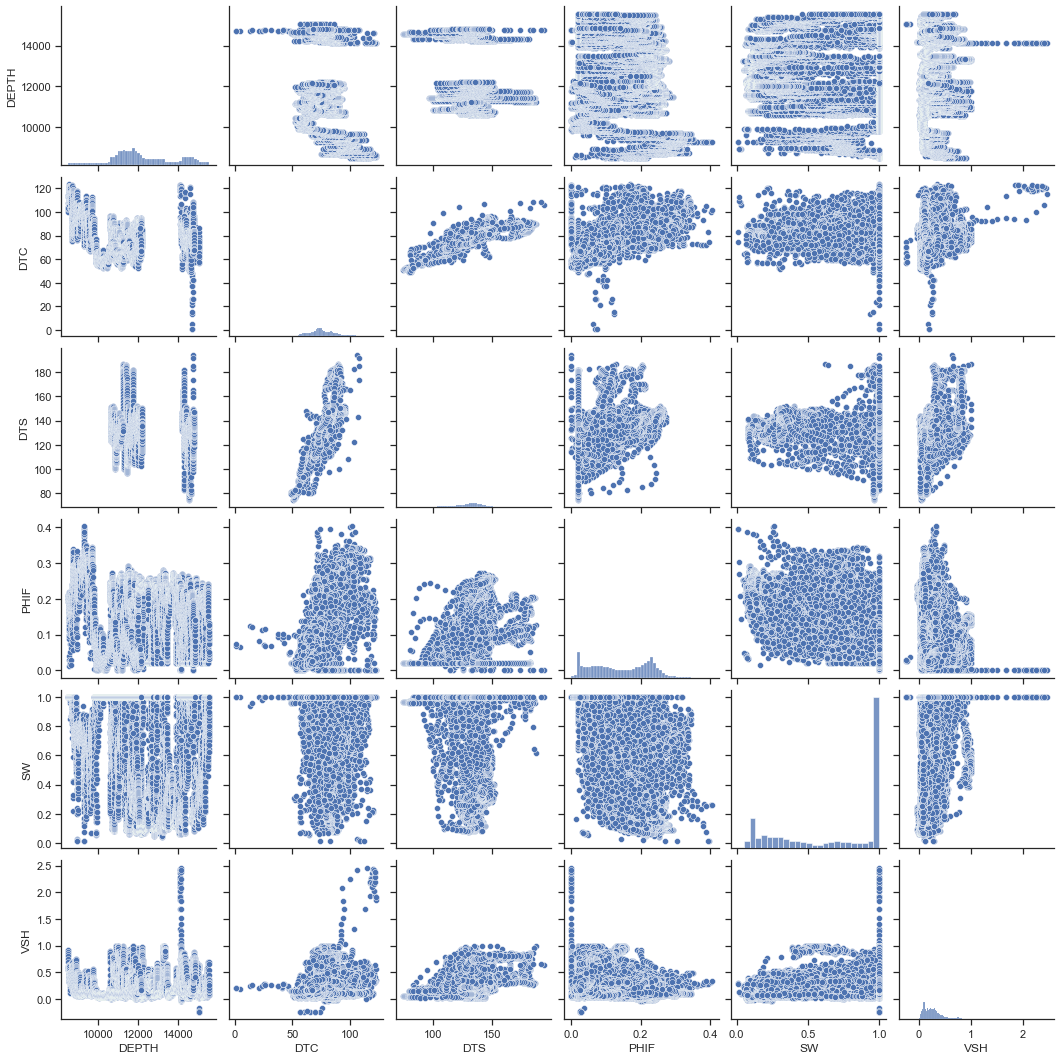

In [271]:
sns.set(style = 'ticks') # Set the background to dark
sns.pairplot(rawdata1, vars=['DEPTH', 'DTC','DTS' ,'PHIF', 'SW', 'VSH'] ) # Create a matrix scatterplot

BIVARIATE ANALYSIS

Lets take some notes from the bivariate analysis

1. DTC- has a positive correlation with PHIF, and minimal correlation with VSH and SW
2. DTS- has a slight positive correlation with VSH

Let us explore further

<AxesSubplot:>

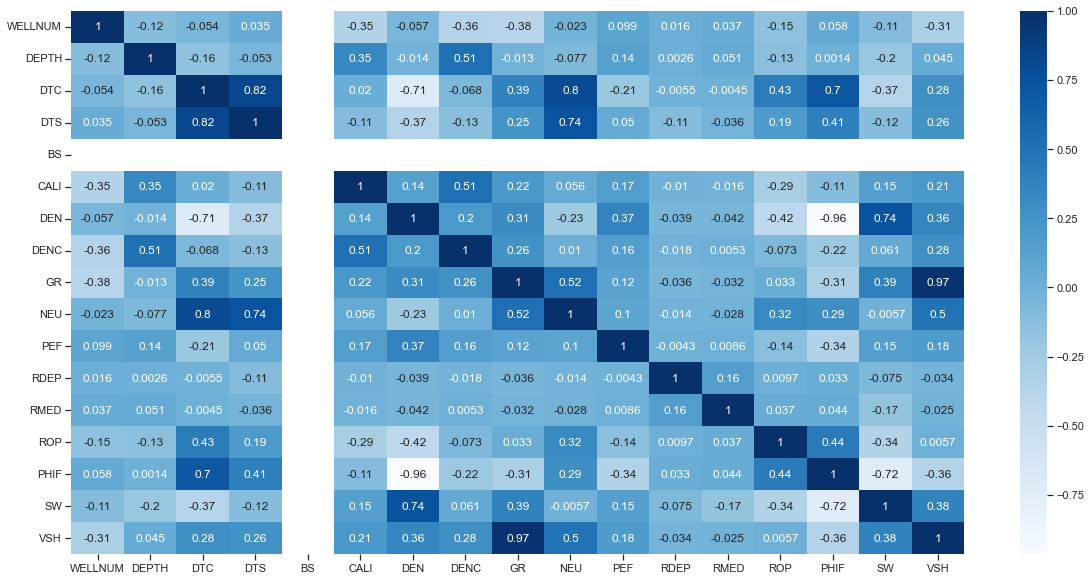

In [272]:
plt.figure(figsize=(20,10))
sns.heatmap(rawdata1.corr(),cbar=True,annot=True,cmap='Blues')

Obviously DTC and DTS have correlations with the target variables

### Let us look at the rawdata1 again

In [273]:
rawdata1.shape

(42309, 17)

### Let us check the percentage of missing values

In [274]:
rawdata1.isna().sum()

WELLNUM        0
DEPTH          0
DTC        22995
DTS        35111
BS          1880
CALI           0
DEN            0
DENC        1880
GR             0
NEU            3
PEF         1880
RDEP         234
RMED           0
ROP         1977
PHIF           0
SW             0
VSH            0
dtype: int64

In [275]:
total = rawdata1.isnull().sum().sort_values(ascending=False)
percent = (rawdata1.isnull().sum()/rawdata1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)

Total   Percent
DTS      35111  0.829871
DTC      22995  0.543501
ROP       1977  0.046728
BS        1880  0.044435
DENC      1880  0.044435
PEF       1880  0.044435
RDEP       234  0.005531
NEU          3  0.000071
WELLNUM      0  0.000000
RMED         0  0.000000
SW           0  0.000000
PHIF         0  0.000000
GR           0  0.000000
DEPTH        0  0.000000
DEN          0  0.000000
CALI         0  0.000000
VSH          0  0.000000

1. The number of missing values in the DTS and DTC data is greater than half of the overal data
2. Removing the missing data would make us lose most of our data


In [276]:
#rawdata1.head(20)

### We would explore techniques on how to deal with the missing values.

1. Imputing the mean would not be the best as compressional and shear wave travel times are affected by depth. 

Hence, we would explore two other techniques,

a. predicting the missing values with linear regression. 

b. Using algorithms that accomodate missing values 

In [277]:
rawdata2=rawdata1.copy(deep = True) # copy rawdata1 in to rawdata2

In [278]:
predictions=rawdata2[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH','DTS']] 
# We select these paramters for the predictions because they have good correlations with the target variable and have no NAN values.

In [279]:
predictions.shape

(42309, 9)

In [280]:
#rawdata2.isna().sum()

In [281]:
rawdata2.shape

(42309, 17)

In [282]:
filt=predictions[predictions["DTS"].isna()]

In [283]:
filt.shape

(35111, 9)

In [284]:
predictions_train= predictions.dropna(how='any', inplace=False)

In [285]:
predictions_train.head()

RMED      SW    PHIF       GR     DEPTH     DEN   CALI     VSH  \
96439  1.9640  0.6187  0.1279  75.1668  11251.31  2.4477  8.625  1.0000   
96440  0.8145  0.6446  0.1248  71.3828  11251.64  2.4529  8.625  0.9452   
96441  0.5584  0.7973  0.1176  65.6385  11251.97  2.4648  8.625  0.8582   
96442  0.5147  1.0000  0.1036  58.8981  11252.30  2.4881  8.625  0.7560   
96443  0.5328  1.0000  0.0813  53.5140  11252.63  2.5250  8.625  0.6745   

            DTS  
96439  186.7906  
96440  185.7127  
96441  184.6462  
96442  183.5797  
96443  182.9750

In [286]:
predictions_train.isna().sum()

RMED     0
SW       0
PHIF     0
GR       0
DEPTH    0
DEN      0
CALI     0
VSH      0
DTS      0
dtype: int64

In [287]:
predictions_train.shape

(7198, 9)

In [288]:
filt.head()

RMED   SW  PHIF        GR         DEPTH     DEN    CALI       VSH  \
27573  2.4927  1.0   0.0   88.8573  14121.660105  2.5777  9.9048  0.751631   
27574  2.4685  1.0   0.0  120.8949  14122.160105  2.4748  9.9912  1.032475   
27575  2.3742  1.0   0.0  153.5195  14122.660105  2.3338  9.9048  1.312757   
27576  2.4142  1.0   0.0  182.8531  14123.160105  2.2358  9.9048  1.682292   
27577  2.4077  1.0   0.0  256.1960  14123.660105  2.2278  9.8095  1.924398   

       DTS  
27573  NaN  
27574  NaN  
27575  NaN  
27576  NaN  
27577  NaN

In [289]:
filt.shape

(35111, 9)

In [290]:
test_data=filt[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH']]

In [291]:
test_data.head()

RMED   SW  PHIF        GR         DEPTH     DEN    CALI       VSH
27573  2.4927  1.0   0.0   88.8573  14121.660105  2.5777  9.9048  0.751631
27574  2.4685  1.0   0.0  120.8949  14122.160105  2.4748  9.9912  1.032475
27575  2.3742  1.0   0.0  153.5195  14122.660105  2.3338  9.9048  1.312757
27576  2.4142  1.0   0.0  182.8531  14123.160105  2.2358  9.9048  1.682292
27577  2.4077  1.0   0.0  256.1960  14123.660105  2.2278  9.8095  1.924398

In [292]:
test_data.shape

(35111, 8)

In [293]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [294]:
#ALL features except DTS
train_data_x =predictions_train[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH']]

In [295]:
train_data_x.head()

RMED      SW    PHIF       GR     DEPTH     DEN   CALI     VSH
96439  1.9640  0.6187  0.1279  75.1668  11251.31  2.4477  8.625  1.0000
96440  0.8145  0.6446  0.1248  71.3828  11251.64  2.4529  8.625  0.9452
96441  0.5584  0.7973  0.1176  65.6385  11251.97  2.4648  8.625  0.8582
96442  0.5147  1.0000  0.1036  58.8981  11252.30  2.4881  8.625  0.7560
96443  0.5328  1.0000  0.0813  53.5140  11252.63  2.5250  8.625  0.6745

In [296]:
#OnLy DTS
#train_data_y =predictions_train.iloc[:,8]# all rows and column 7 ; NB columns start from 0

In [297]:
train_data_y= predictions_train[['DTS']]

In [298]:
train_data_y.head()

DTS
96439  186.7906
96440  185.7127
96441  184.6462
96442  183.5797
96443  182.9750

In [299]:
x_train=train_data_x.to_numpy()

In [300]:
#x_train

In [301]:
#y_train.shape

In [302]:
y_train=train_data_y.to_numpy()

In [303]:
linreg.fit(x_train,y_train)

LinearRegression()

In [304]:
x_test=test_data.to_numpy()

In [305]:
x_test.shape

(35111, 8)

In [306]:
#DTS_predicted['DTS']=pd.DataFrame(linreg.predict(x_test))

In [307]:
predicted_dee=linreg.predict(x_test)

In [308]:
predicted_df=pd.DataFrame(predicted_dee)

In [309]:
predicted_df

0
0      165.060293
1      176.704943
2      181.488756
3      197.532364
4      190.950676
...           ...
35106  112.350226
35107  109.551484
35108  107.615494
35109  106.194045
35110  106.350038

[35111 rows x 1 columns]

In [310]:
predicted_df.isna().sum()

0    0
dtype: int64

In [311]:
predicted_df_list=predicted_df.values.tolist()

In [312]:
len(predicted_df_list)

35111

In [313]:
#predicted_df

In [314]:
#rawdata2.DTS.fillna(1, inplace=True)

In [315]:
rawdata2.loc[rawdata2.DTS.isna(),'DTS']=predicted_df_list

In [316]:
rawdata2.isna().sum()

WELLNUM        0
DEPTH          0
DTC        22995
DTS            0
BS          1880
CALI           0
DEN            0
DENC        1880
GR             0
NEU            3
PEF         1880
RDEP         234
RMED           0
ROP         1977
PHIF           0
SW             0
VSH            0
dtype: int64

In [317]:
##rawdata2.isna().sum()

1. We have successfully replaced all the nan values in rawdata2
2. Let us repeat the process for DTC

In [318]:
predictions1=rawdata2[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH','DTC']]

In [319]:
filt1=predictions1[predictions1["DTC"].isna()]

In [320]:
filt1.shape

(22995, 9)

In [321]:
predictions1_train=predictions1.dropna(how='any', inplace=False)

In [322]:
predictions1_train.head()

RMED   SW  PHIF        GR         DEPTH     DEN    CALI       VSH  \
27573  2.4927  1.0   0.0   88.8573  14121.660105  2.5777  9.9048  0.751631   
27574  2.4685  1.0   0.0  120.8949  14122.160105  2.4748  9.9912  1.032475   
27575  2.3742  1.0   0.0  153.5195  14122.660105  2.3338  9.9048  1.312757   
27576  2.4142  1.0   0.0  182.8531  14123.160105  2.2358  9.9048  1.682292   
27577  2.4077  1.0   0.0  256.1960  14123.660105  2.2278  9.8095  1.924398   

            DTC  
27573   89.6461  
27574   96.0152  
27575  104.0457  
27576  113.5010  
27577  117.7817

In [323]:
predictions1_train.shape

(19314, 9)

In [324]:
test_data1=filt1[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH']]

In [325]:
linreg1 = LinearRegression()

In [326]:
train_data_x1 =predictions1_train[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH']]

In [327]:
train_data_y1= predictions1_train[['DTC']]

In [328]:
x_train1=train_data_x1.to_numpy()

In [329]:
y_train1=train_data_y1.to_numpy()

In [330]:
linreg1.fit(x_train1,y_train1)

LinearRegression()

In [331]:
x_test1=test_data1.to_numpy()

In [332]:
predicted_dep=linreg1.predict(x_test1)

predicted_df1=pd.DataFrame(predicted_dep)

In [333]:
predicted_df1.shape

(22995, 1)

In [334]:
predicted_df1.head()

0
0  79.947317
1  80.392912
2  80.356764
3  80.773471
4  80.916097

In [335]:
predicted_df1.rename(columns={0: "DTC"}, inplace=True)

In [336]:
predicted_df1.isna().sum()

DTC    0
dtype: int64

In [337]:
predicted_df1_list=predicted_df1.values.tolist()

In [338]:
rawdata2.loc[rawdata2.DTC.isna(),'DTC']=predicted_df1_list

In [339]:
rawdata2.isna().sum()

WELLNUM       0
DEPTH         0
DTC           0
DTS           0
BS         1880
CALI          0
DEN           0
DENC       1880
GR            0
NEU           3
PEF        1880
RDEP        234
RMED          0
ROP        1977
PHIF          0
SW            0
VSH           0
dtype: int64

In [340]:
# DTC missing values has also been removed

### Lets repeat the process for corrected density and photoelectric factor

In [341]:
predictions3=rawdata2[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH','DENC']]

In [342]:
filt_denc=predictions3[predictions3["DENC"].isna()]

In [343]:
predictions3_train=predictions3.dropna(how='any', inplace=False)

In [344]:
predictions3_train.shape

(40429, 9)

In [345]:
filt_denc.shape

(1880, 9)

In [346]:
test_data_denc=filt_denc[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH']]

In [347]:
linreg2 = LinearRegression()

In [348]:
train_data_x_denc = predictions3_train[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH']]

In [349]:
train_data_y_denc= predictions3_train[['DENC']]

In [350]:
x_train_denc=train_data_x_denc.to_numpy()

y_train_denc=train_data_y_denc.to_numpy()

In [351]:
linreg2.fit(x_train_denc,y_train_denc)

LinearRegression()

In [352]:
x_test_denc=test_data_denc.to_numpy()

In [353]:
predicted_denc=linreg2.predict(x_test_denc)

predicted_df_denc=pd.DataFrame(predicted_denc)

In [354]:
predicted_df_denc.head()

0
0  0.156224
1  0.168483
2  0.170015
3  0.170992
4  0.195121

In [355]:
predicted_df_denc.rename(columns={0: "DENC"}, inplace=True)

In [356]:
predicted_df_denc_list=predicted_df_denc.values.tolist()

In [357]:
rawdata2.loc[rawdata2.DENC.isna(),'DENC']=predicted_df_denc_list

In [358]:
rawdata2.isna().sum()

WELLNUM       0
DEPTH         0
DTC           0
DTS           0
BS         1880
CALI          0
DEN           0
DENC          0
GR            0
NEU           3
PEF        1880
RDEP        234
RMED          0
ROP        1977
PHIF          0
SW            0
VSH           0
dtype: int64

### Repeat for PEF

In [359]:
predictions_pef=rawdata2[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH','PEF']]

In [360]:
filt_pef=predictions_pef[predictions_pef["PEF"].isna()]

In [361]:
predictions_pef_train=predictions_pef.dropna(how='any', inplace=False)

In [362]:
test_data_pef=filt_pef[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH']]

In [363]:
linreg_pef = LinearRegression()
train_data_x_pef = predictions_pef_train[['RMED','SW','PHIF','GR','DEPTH','DEN','CALI','VSH']]
train_data_y_pef= predictions_pef_train[['PEF']]

In [364]:
x_train_pef=train_data_x_pef.to_numpy()
y_train_pef=train_data_y_pef.to_numpy()

In [365]:
linreg_pef.fit(x_train_pef,y_train_pef)

LinearRegression()

In [366]:
x_test_pef=test_data_pef.to_numpy()

In [367]:
predicted_pef=linreg2.predict(x_test_pef)

predicted_df_pef=pd.DataFrame(predicted_pef)

In [368]:
predicted_df_pef.head()

0
0  0.156224
1  0.168483
2  0.170015
3  0.170992
4  0.195121

In [369]:
predicted_df_pef.rename(columns={0: "PEF"}, inplace=True)

In [370]:
predicted_df_pef

PEF
0     0.156224
1     0.168483
2     0.170015
3     0.170992
4     0.195121
...        ...
1875  0.173113
1876  0.174415
1877  0.174154
1878  0.172639
1879  0.171434

[1880 rows x 1 columns]

In [371]:
predicted_df_pef_list=predicted_df_pef.values.tolist()

In [372]:
#predicted_df_pef_list

In [373]:
rawdata2.loc[rawdata2.PEF.isna(),'PEF']=predicted_df_pef_list

In [374]:
rawdata2.isna().sum()

WELLNUM       0
DEPTH         0
DTC           0
DTS           0
BS         1880
CALI          0
DEN           0
DENC          0
GR            0
NEU           3
PEF           0
RDEP        234
RMED          0
ROP        1977
PHIF          0
SW            0
VSH           0
dtype: int64

### Before we proceed, Let us go through our data one more time 

1. rawdata: The original data consisting all data points as obtained from the vogue field. 
2. rawdata1: Original data after replacing -999 values with NAN values based on domain knowledge and removing missing values
3. rawdata2: modified rawdata 2 with still existing missing values replaced with predicted values from linear regression

We would create a new dataset with all paramters that affect the target variables based on domain knowledge called rawwdata3

Let us visualize the new dataset

In [375]:
def log_plot(logs):
    from matplotlib.patches import Patch
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bot = logs.DEPTH.max()
    
    f, ax = plt.subplots(nrows=1, ncols=11, figsize=(15, 10))
    ax[0].plot(logs.GR, logs.DEPTH, color='green')
    ax[1].plot(logs.DEN, logs.DEPTH, color='red')
    ax[2].plot(logs.DENC, logs.DEPTH, color='blueviolet')
    ax[3].plot(logs.NEU, logs.DEPTH, color='chocolate')
    ax[4].plot(logs.PEF, logs.DEPTH, color='cyan')
    ax[5].plot(logs.RDEP, logs.DEPTH, color='crimson')
    ax[6].plot(logs.RMED, logs.DEPTH, color='magenta')
    ax[7].plot(logs.ROP, logs.DEPTH, color='olive')
    ax[8].plot(logs.PHIF, logs.DEPTH, color='teal')
    ax[9].plot(logs.SW, logs.DEPTH, color='gray')
    ax[10].plot(logs.VSH, logs.DEPTH, color='deepskyblue')
  
    
    
    
    
    #ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 0,color = 'blue')
    #ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 1,color = 'red')
    #ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 2,color = 'green')
    #ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 3,color = 'purple')
    #ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 4,color = 'brown')
    #ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 5,color = 'gray')
    #ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 6,color = 'yellow')
    #ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 7,color = 'navy')
    #ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 8,color = 'orange')

                

    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR", fontsize = 10)
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth(ft)",fontsize = 16)
    ax[1].set_xlabel("DEN", fontsize = 10)
    ax[1].set_xlim(logs.DEN.min(),logs.DEN.max())
    ax[2].set_xlabel("DENC", fontsize = 10)
    ax[2].set_xlim(logs.DENC.min(),logs.DEN.max())
    ax[3].set_xlabel("NEU", fontsize = 10)
    ax[3].set_xlim(logs.NEU.min(),logs.DEN.max())
    ax[4].set_xlabel("PEF", fontsize = 10)
    ax[4].set_xlim(logs.PEF.min(),logs.DEN.max())
    ax[5].set_xlabel("RDEP", fontsize = 10)
    ax[5].set_xlim(logs.RDEP.min(),logs.DEN.max())
    ax[6].set_xlabel("RMED", fontsize = 10)
    ax[6].set_xlim(logs.RMED.min(),logs.DEN.max())
    ax[7].set_xlabel("ROP", fontsize = 10)
    ax[7].set_xlim(logs.ROP.min(),logs.DEN.max())
    ax[8].set_xlabel("PHIF", fontsize = 10)
    ax[8].set_xlim(logs.PHIF.min(),logs.DEN.max())
    ax[9].set_xlabel("SW", fontsize = 10)
    ax[9].set_xlim(logs.SW.min(),logs.DEN.max())
    ax[10].set_xlabel("VSH", fontsize = 10)
    ax[10].set_xlim(logs.VSH.min(),logs.DEN.max())
    
    #ax[15].set_xlabel("WELLNUM", fontsize = 10)
    
#    ax[15].set_xlim(logs.WELLNUM.min(),logs.WELLNUM.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([]); ax[4].set_yticklabels([]);
    ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[8].set_yticklabels([]);
    ax[9].set_yticklabels([]); ax[10].set_yticklabels([]);
    #ax[11].set_yticklabels([]); #ax[12].set_yticklabels([]);
    #ax[13].set_yticklabels([]); ax[14].set_yticklabels([]);
    #ax[15].set_yticklabels([]); #ax[16].set_yticklabels([])
    #legend_elements = [Patch(facecolor='blue', edgecolor='blue', label='0')
                       #Patch(facecolor='red', edgecolor='red',   label='1'),
                       #Patch(facecolor='green', edgecolor='green', label='2'),
                       #Patch(facecolor='purple', edgecolor='purple', label='3'),
                       #Patch(facecolor='brown', edgecolor='brown', label='4'),
                       #Patch(facecolor='gray', edgecolor='gray', label='5'),
                       #Patch(facecolor='yellow', edgecolor='yellow', label='6'),
                       #Patch(facecolor='navy', edgecolor='navy', label='7'),
                       #Patch(facecolor='orange', edgecolor='orange', label='8')]
                             
    #ax[16].legend(handles=legend_elements, loc='best')
    
    f.suptitle('Well Logs', fontsize=20,y=0.94)

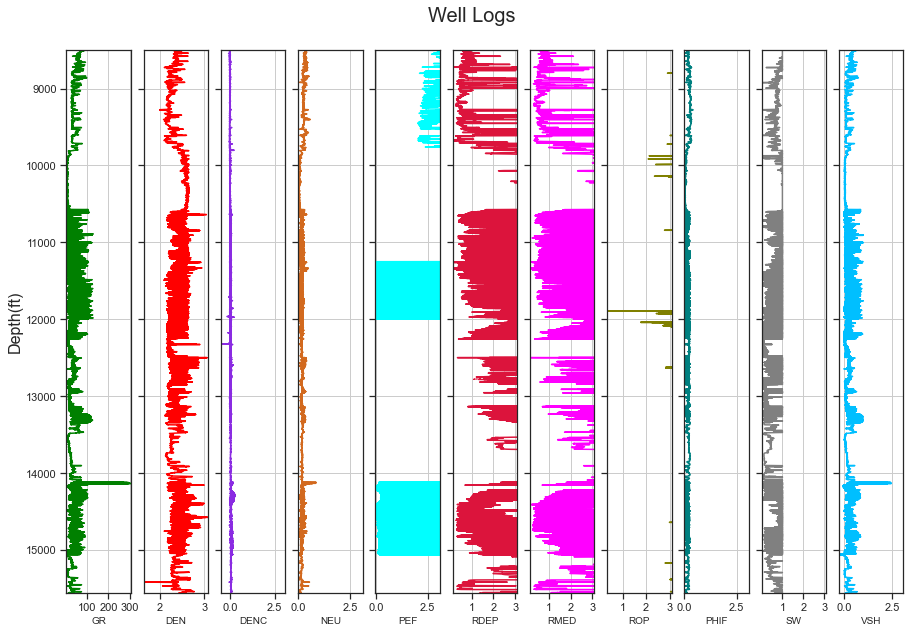

In [376]:
 log_plot(rawdata2)

In [377]:
rawdata2.shape

(42309, 17)

In [378]:
rawdata3=rawdata2[['RMED','RDEP','SW','PHIF','GR','NEU','DEPTH','DTS','DTC','DEN','DENC','CALI','VSH','PEF']]
# ROP and BS and WELLNUM were left out. 

In [379]:
rawdata3.isna().sum()

RMED       0
RDEP     234
SW         0
PHIF       0
GR         0
NEU        3
DEPTH      0
DTS        0
DTC        0
DEN        0
DENC       0
CALI       0
VSH        0
PEF        0
dtype: int64

In [380]:
rawdata_new=rawdata3.dropna(how='any', inplace=False)

In [381]:
rawdata_new.isna().sum()

RMED     0
RDEP     0
SW       0
PHIF     0
GR       0
NEU      0
DEPTH    0
DTS      0
DTC      0
DEN      0
DENC     0
CALI     0
VSH      0
PEF      0
dtype: int64

### Lets analyze and visualize our new dataset

In [382]:
rawdata_new.shape

(42072, 14)

In [383]:
# Statistics of the data 
rawdata_new.describe()

RMED          RDEP            SW          PHIF            GR  \
count  42072.000000  42072.000000  42072.000000  42072.000000  42072.000000   
mean     751.817593     25.201381      0.669053      0.141716     39.925769   
std     6637.276219    440.405525      0.354409      0.081228     24.868544   
min        0.139400      0.129500      0.013000      0.000000      4.588597   
25%        1.523700      1.475500      0.300000      0.068200     20.020650   
50%        3.286912      2.785450      0.813400      0.141000     35.851850   
75%       10.936625      9.130000      1.000000      0.217000     52.064752   
max    62290.800000  80266.800000      1.000000      0.403294    304.333700   

                NEU         DEPTH           DTS           DTC           DEN  \
count  42072.000000  42072.000000  42072.000000  42072.000000  42072.000000   
mean       0.181695  12240.953306    132.391340     78.808356      2.411121   
std        0.066884   1606.343891     16.339841     10.339959      0.160803   
min       -0.003400   8494.000000     74.822400      1.025100      1.626600   
25%        0.144200  11187.660000    122.970506     72.223375      2.264300   
50%        0.176500  11903.540000    132.218136     79.579022      2.419700   
75%        0.215700  13349.492500    140.118915     85.396675      2.544321   
max        0.862567  15566.930000    259.713583    123.253500      3.089600   

               DENC          CALI           VSH           PEF  
count  42072.000000  42072.000000  42072.000000  42072.000000  
mean       0.049676      8.662779      0.275740      4.958843  
std        0.030605      0.279899      0.207018      1.979067  
min       -0.487100      8.304600     -0.248000     -0.013100  
25%        0.035602      8.556900      0.113200      4.431075  
50%        0.049300      8.625000      0.233000      5.358870  
75%        0.062000      8.671900      0.360625      6.056600  
max        0.283083     11.904800      2.460104     13.356600

145.9885322677028
9.05900251084225
1.5262268171282791


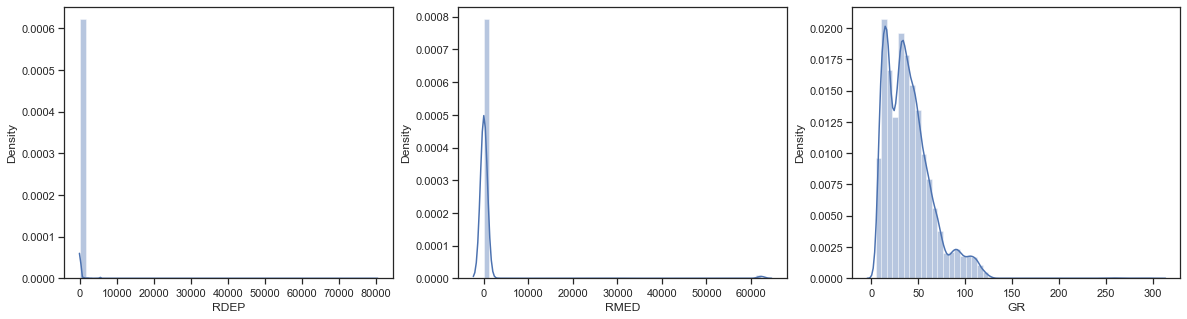

In [384]:
plt.figure(figsize = (20,5)) 
plt.subplot(1, 3, 1)  
sns.distplot(rawdata_new['RDEP'])
print(rawdata_new['RDEP'].skew())

plt.subplot(1, 3, 2)  
sns.distplot(rawdata_new['RMED'])
print(rawdata_new['RMED'].skew())

plt.subplot(1, 3, 3)  
sns.distplot(rawdata_new['GR'])
print(rawdata_new['GR'].skew())

0.8733368526597695
1.7116916458083913
0.12254424503736724


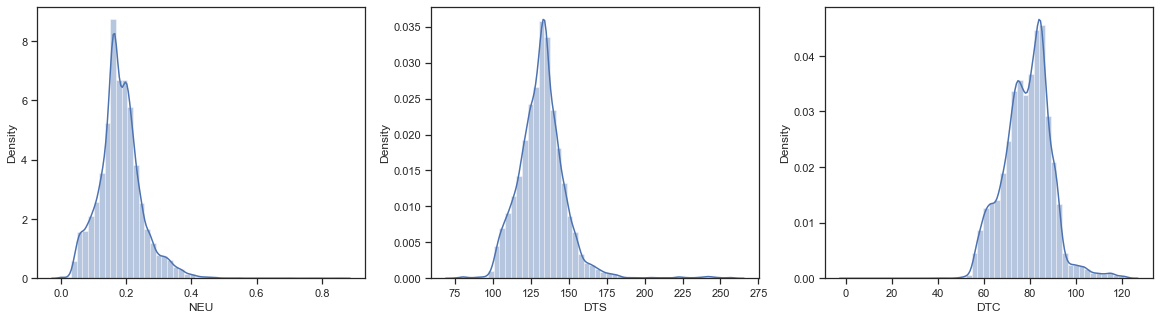

In [385]:
plt.figure(figsize = (20,5)) 
plt.subplot(1, 3, 1)  
sns.distplot(rawdata_new['NEU'])
print(rawdata_new['NEU'].skew())

plt.subplot(1, 3, 2)  
sns.distplot(rawdata_new['DTS'])
print(rawdata_new['DTS'].skew())

plt.subplot(1, 3, 3)  
sns.distplot(rawdata_new['DTC'])
print(rawdata_new['DTC'].skew())

1. NEU, DTS and DTC are fairly  uniformly distributed

0.11983641287598834
1.8808456206770305
-1.0745932716772264


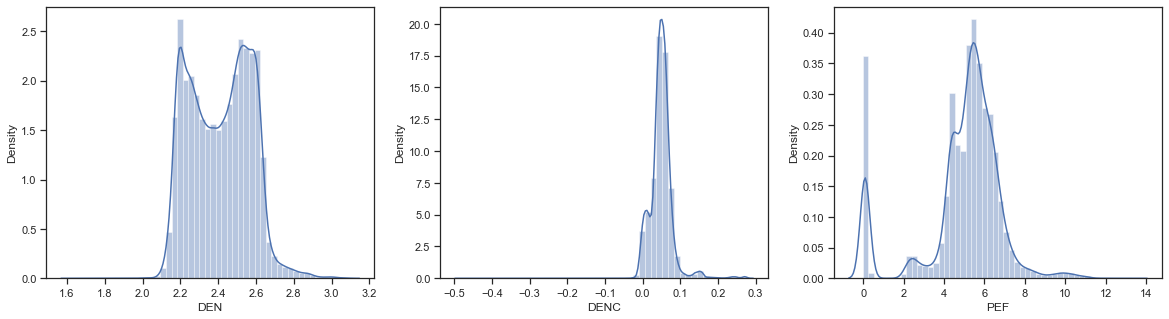

In [386]:
plt.figure(figsize = (20,5)) 
plt.subplot(1, 3, 1)  
sns.distplot(rawdata_new['DEN'])
print(rawdata_new['DEN'].skew())

plt.subplot(1, 3, 2)  
sns.distplot(rawdata_new['DENC'])
print(rawdata_new['DENC'].skew())

plt.subplot(1, 3, 3)  
sns.distplot(rawdata_new['PEF'])
print(rawdata_new['PEF'].skew())

1. Density log is bimodal, Corrected density log is fairly normally distributed and PEF bimodal as well 

1.7116916458083913
6.901334767216428
1.7292309373870278


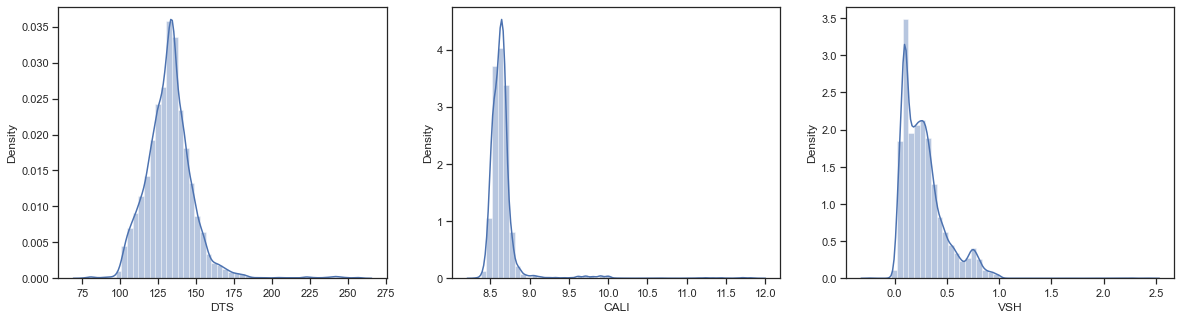

In [387]:
plt.figure(figsize = (20,5)) 
plt.subplot(1, 3, 1)  
sns.distplot(rawdata_new['DTS'])
print(rawdata_new['DTS'].skew())

plt.subplot(1, 3, 2)  
sns.distplot(rawdata_new['CALI'])
print(rawdata_new['CALI'].skew())

plt.subplot(1, 3, 3)  
sns.distplot(rawdata_new['VSH'])
print(rawdata_new['VSH'].skew())

1. DTS is failry normal, CALI is right skewed and VSH is left-skewed

0.17565140995179995
0.019139239548716217
-0.44427048625401516


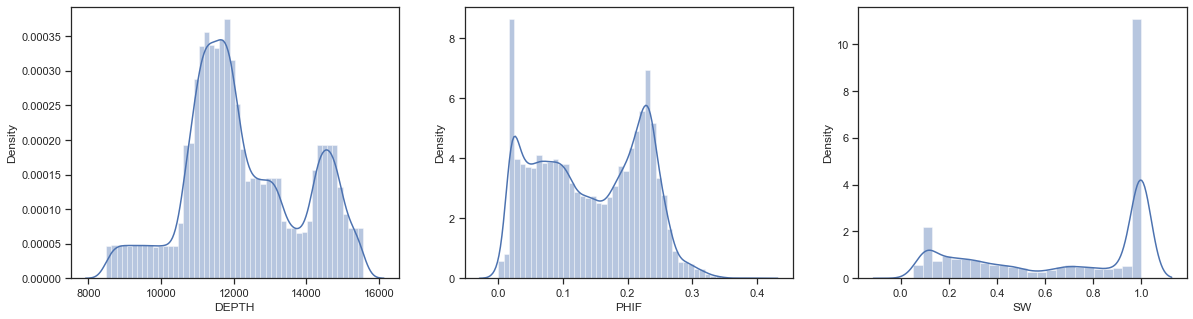

In [388]:
plt.figure(figsize = (20,5)) 
plt.subplot(1, 3, 1)  
sns.distplot(rawdata_new['DEPTH'])
print(rawdata_new['DEPTH'].skew())

plt.subplot(1, 3, 2)  
sns.distplot(rawdata_new['PHIF'])
print(rawdata_new['PHIF'].skew())

plt.subplot(1, 3, 3)  
sns.distplot(rawdata_new['SW'])
print(rawdata_new['SW'].skew())

1. All three paramters here are biomodal

#### Boxplots

<AxesSubplot:>

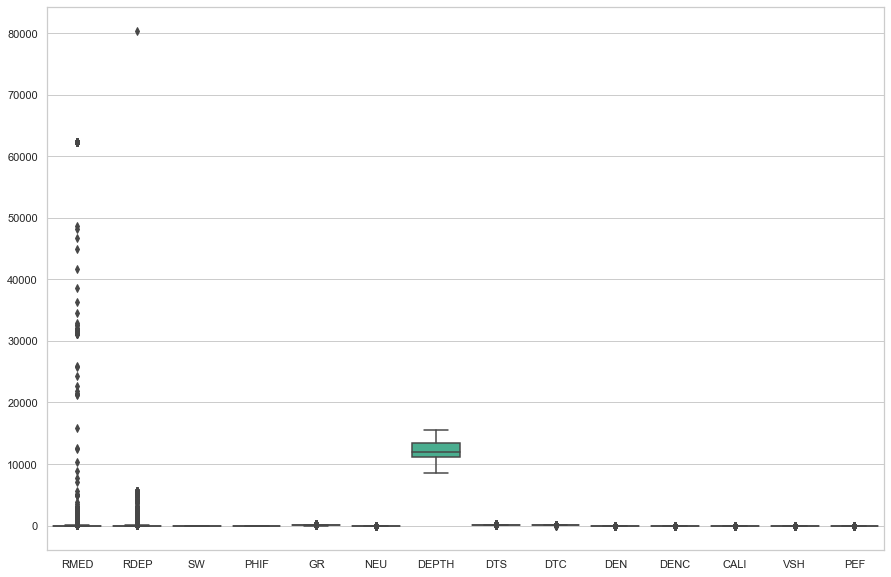

In [389]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.boxplot(data=rawdata_new)
#plt.show()

1. Plotting all the boxplots does not reveal the true nature of the individual datasets due to large variations in the measurements. 
2. Let us plot them idividually

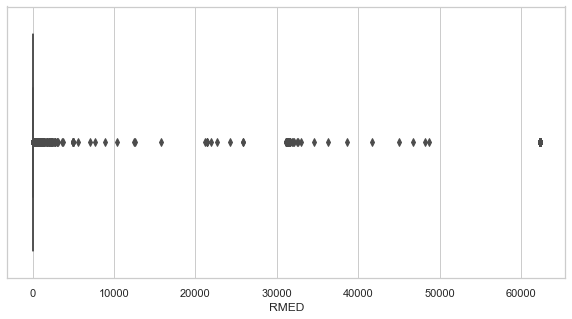

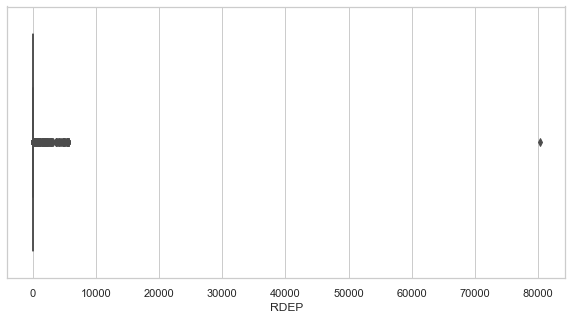

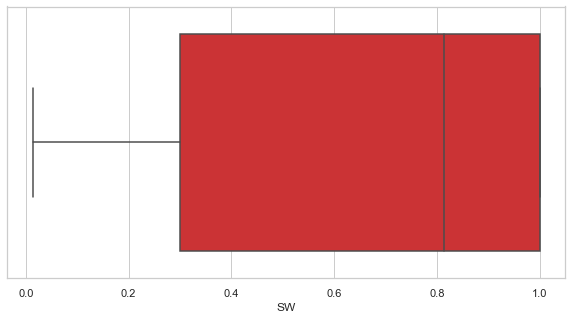

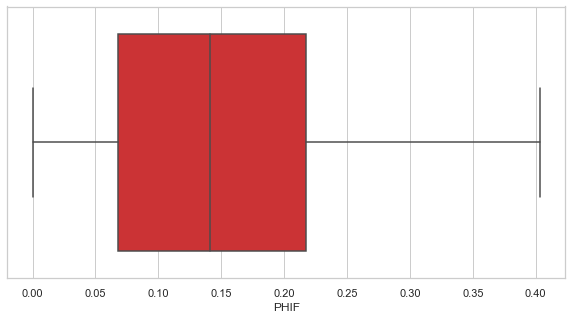

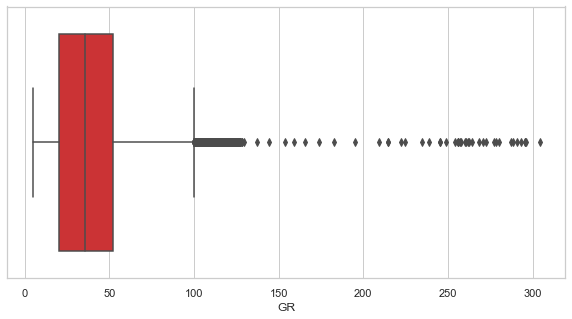

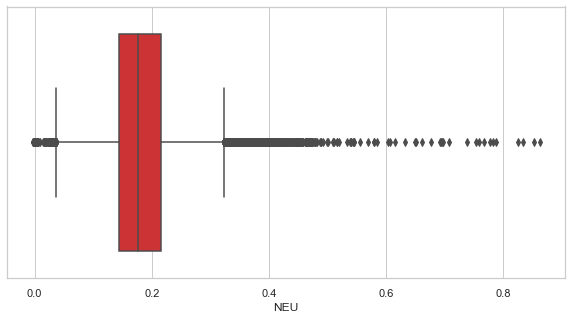

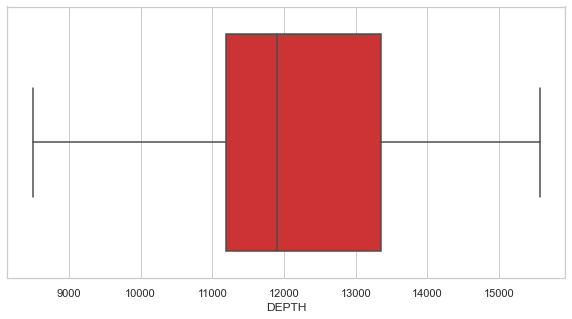

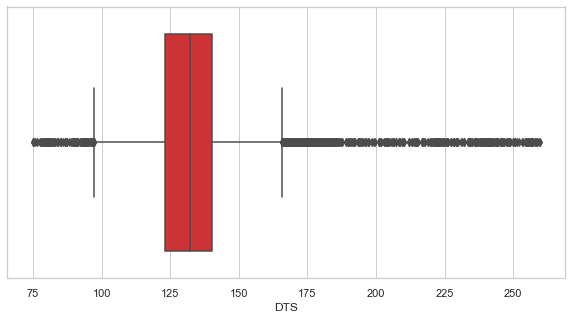

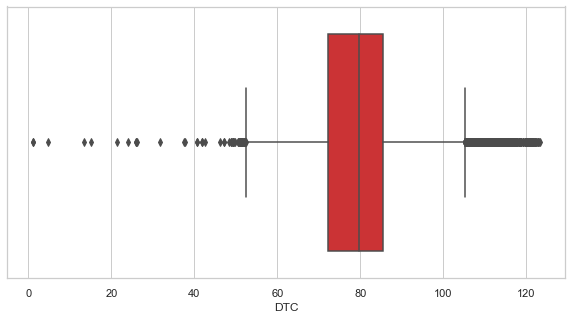

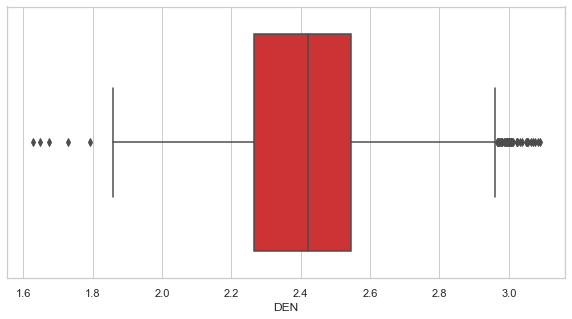

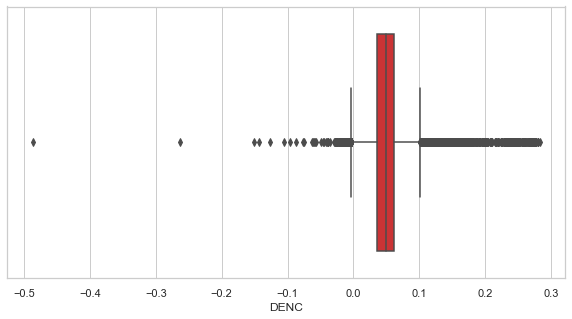

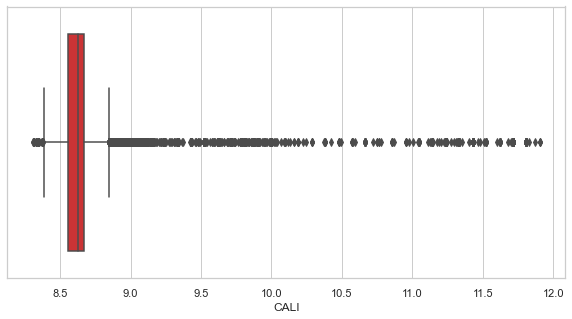

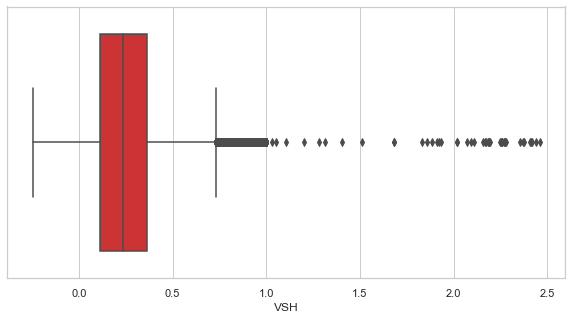

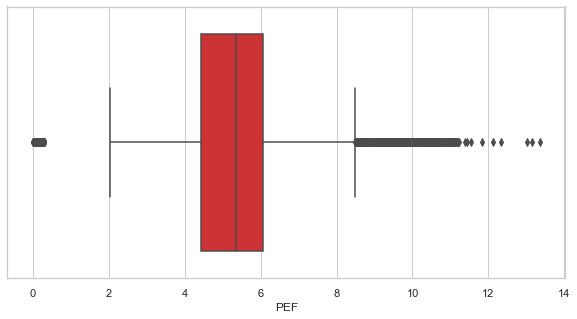

In [390]:
columns = ['RMED','RDEP','SW','PHIF','GR','NEU','DEPTH','DTS','DTC','DEN','DENC','CALI','VSH','PEF']
def plot_boxplots(rawdata_new, cols):
    for col in cols:
        plt.figure(figsize = (10,5))
        sns.boxplot(col, data=rawdata_new, palette="Set1")
        plt.show()

plot_boxplots(rawdata_new, columns)

### VIOLIN PLOTS

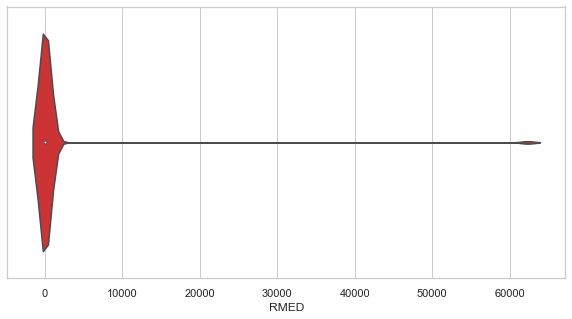

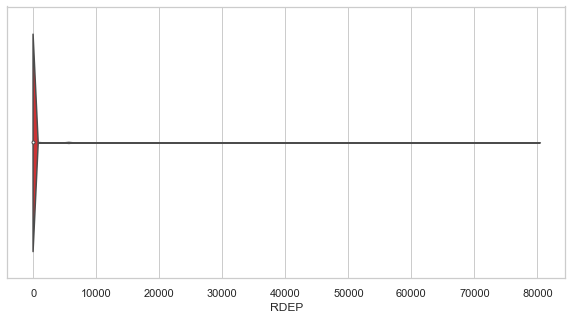

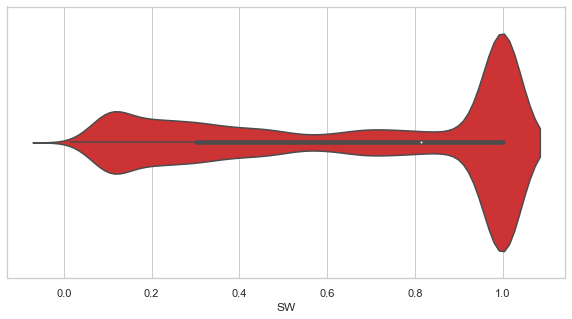

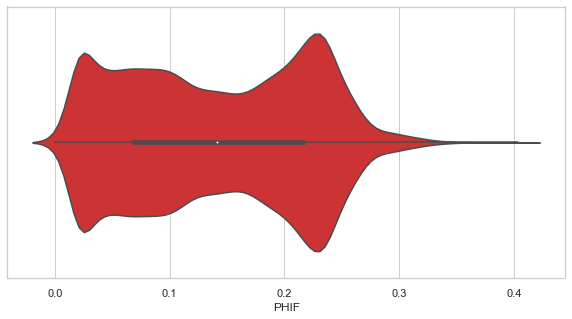

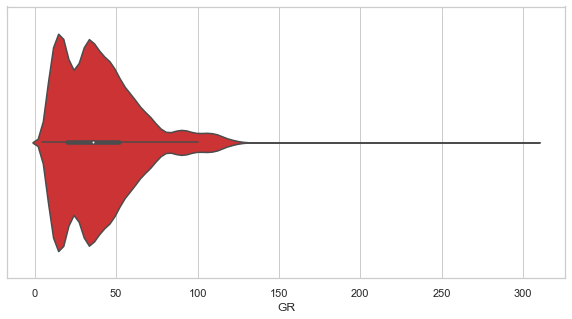

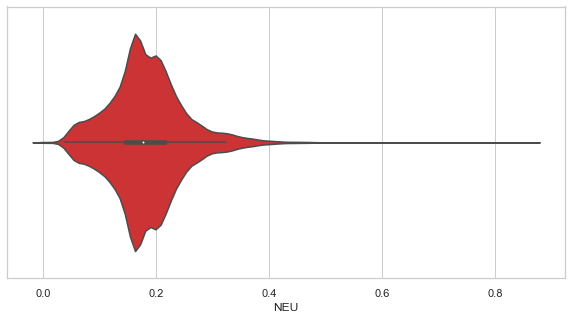

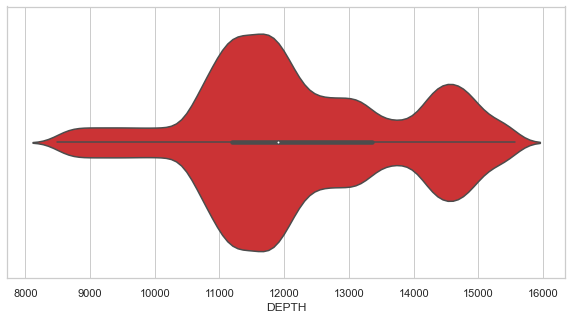

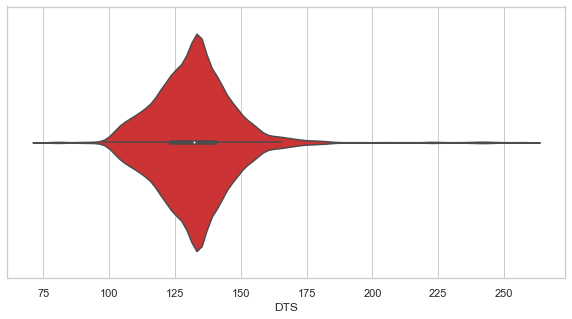

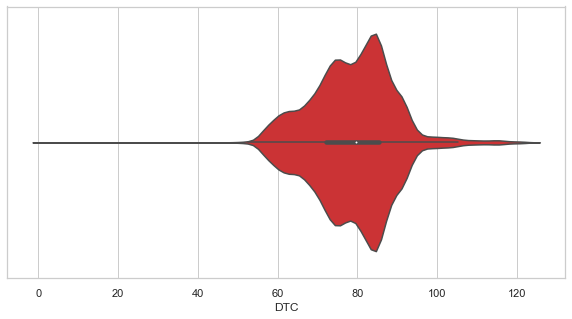

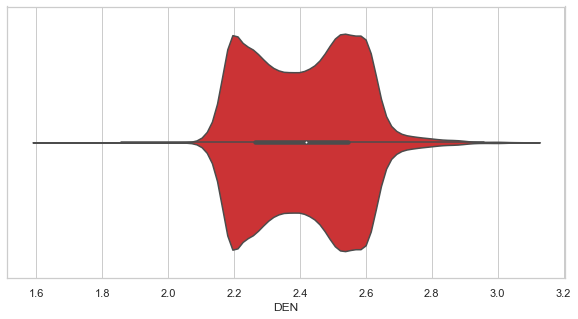

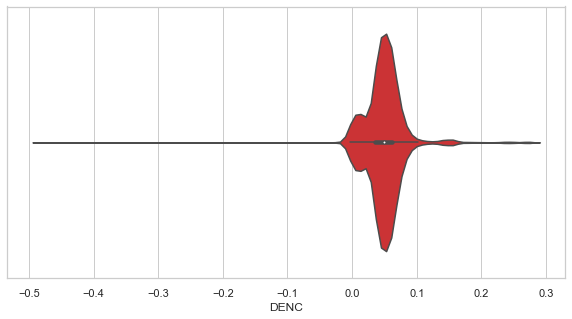

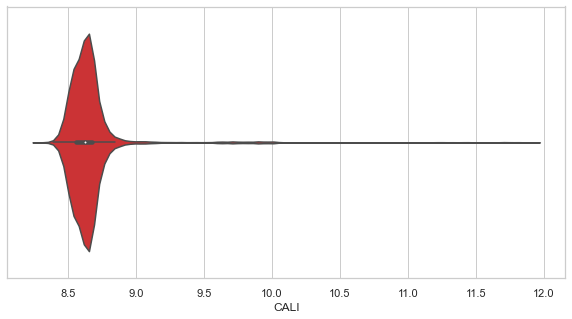

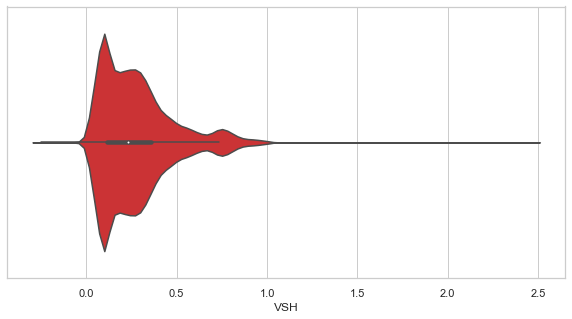

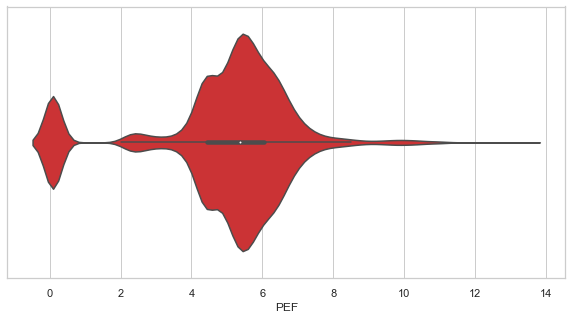

In [391]:
columns = ['RMED','RDEP','SW','PHIF','GR','NEU','DEPTH','DTS','DTC','DEN','DENC','CALI','VSH','PEF']
def plot_violinplots(rawdata_new, cols):
    for col in cols:
        plt.figure(figsize = (10,5))
        sns.violinplot(col, data=rawdata_new, palette="Set1")
        plt.show()

plot_violinplots(rawdata_new, columns)

### Pairplots 

In [392]:
#sns.set(style = 'ticks')
#sns.pairplot(rawdata_new,  vars=['RMED','RDEP','SW','PHIF','GR','NEU','DEPTH','DTS','DTC','DEN','DENC','CALI','VSH','PEF'])

1. The distributions plotted above show some significant number of outliers. Let us explore them .

In [393]:
#!pip install pandas-profiling

In [394]:
#from pandas_profiling import ProfileReport
#design_report = ProfileReport(rawdata_new)
#design_report.to_file(output_file='Lith_report_profile.html')

In [395]:
#!pip install sweetviz

In [396]:
#import sweetviz as sv
#sweet_report = sv.analyze(rawdata_new)
#sweet_report.show_html('Lith_report_sweet.html')

### Outlier Detection and Removal 

In [397]:
# Use isolation forest to detect outliers

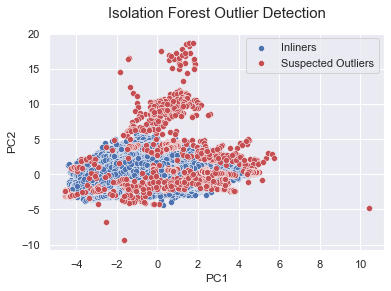

In [398]:
# Use Isolation Forest to detect the prescence of outliers
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")

XI = rawdata_new.values #returns a numpy array with the underlying data without column names nor indeces. 

iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.03, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)

# Returns 1 of inliers, -1 for outliers
pred = iforest.fit_predict(XI)

# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = XI[outlier_index] # The anomalies are predicted with values of -1. 

# Feature scaling 
sc=StandardScaler()
XI_scaled = sc.fit_transform(XI)
outlier_values_scaled = sc.transform(outlier_values)

#Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
XI_pca = pca.fit_transform(XI_scaled)
outlier_values_pca = pca.transform(outlier_values_scaled)

# Plot the data
sns.scatterplot(x=XI_pca[:,0], y=XI_pca[:,1])
sns.scatterplot(x=outlier_values_pca[:,0], 
                y=outlier_values_pca[:,1], color='r')
plt.title("Isolation Forest Outlier Detection", 
           fontsize=15, pad=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(['Inliners','Suspected Outliers'])

In [399]:
#pred_df=pd.DataFrame(pred, columns=['Predictions'])

In [400]:
#pred_df

### Let us try DB-SCAN

from sklearn.cluster import DBSCAN

DI = rawdata_new.values #returns a numpy array with the underlying data without column names nor indeces.
# Create DBSCAN model with parameters
DB_model = DBSCAN(eps=0.5,min_samples=2) #metric= 'euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

pred_DB = DB_model.fit_predict(DI)
# Extract outliers
outlier_index1 = np.where(pred_DB==-1)
outlier_values1 = DI[outlier_index1] # The anomalies are predicted with values of -1. 

# Feature scaling 
sc=StandardScaler()
DI_scaled1 = sc.fit_transform(DI)
outlier_values_scaled1 = sc.transform(outlier_values1)

#Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
DI_pca1 = pca.fit_transform(DI_scaled1)
outlier_values_pca1 = pca.transform(outlier_values_scaled1)

# Plot the data
sns.scatterplot(x=DI_pca1[:,0], y=DI_pca1[:,1])
sns.scatterplot(x=outlier_values_pca1[:,0], 
               y=outlier_values_pca1[:,1], color='r')
plt.title("Isolation Forest Outlier Detection", 
           fontsize=15, pad=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(['Inliners','Suspected Outliers'])


In [401]:
#pred_DB_df= pd.DataFrame(pred_DB, columns=['Predictions'])

In [402]:
#pred_DB_df.describe()

The isolation forest method has shown that indeed we have a significant number of outliers. 

1. We have significant number of outliers in the following logs; NEU, GR, RMED, CALI, VSH, PEF, DENC, DTS and DTC as seen in the plots. 

Now Lets address the outliers. 

### Outlier Detection & Removal 

1. We are going to address two outlier removal techniques and see the effects of both of them in model prediction 

a. The Z-score method

b. The percentile method. 

### Z-score

1. Let us define a new dataset cleaned based on the z-score of all paramters in the data.

In [403]:
from scipy import stats
rawd_zscore= rawdata_new[(np.abs(stats.zscore(rawdata_new)) < 3).all(axis=1)]

In [404]:
#from scipy import stats
# Selecting a subset of the dataset with significant outliers
#subset_rawdata_new= rawdata_new[['NEU', 'GR', 'RMED', 'CALI', 'VSH', 'PEF', 'DENC', 'DTS', 'DTC','RDEP']]

#subset_rawdata_new = subset_rawdata_new[(np.abs(stats.zscore(subset_rawdata_new)) < 10).all(axis=1)]

# We define a new data set called rawdata_new_z_scored with the z-scored data. 
#rawdata_new_z_scored = rawdata_new.merge(subset_rawdata_new,on=['NEU', 'GR', 'RMED', 'CALI', 'VSH', 'PEF', 'DENC', 'DTS', 'DTC','RDEP'])

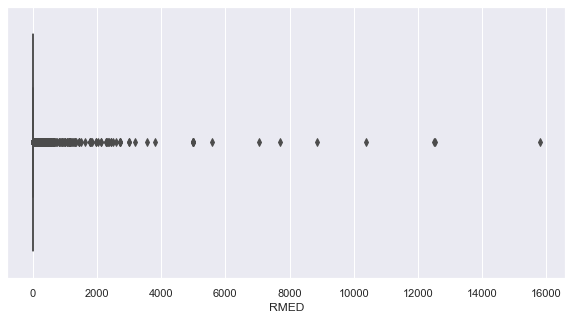

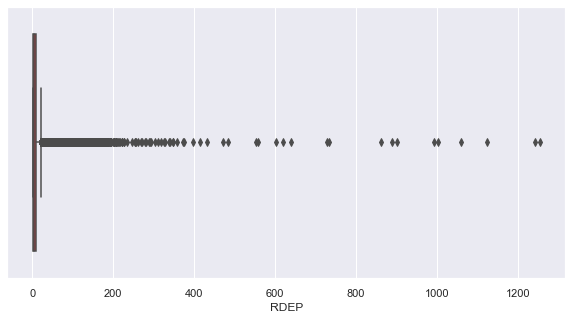

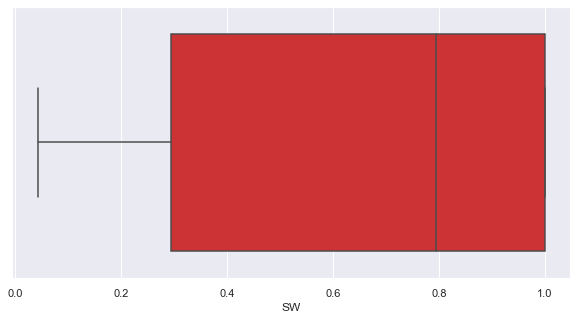

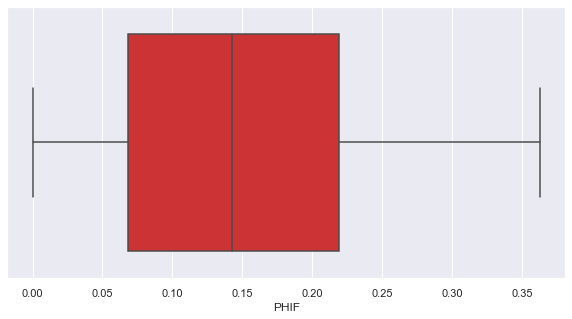

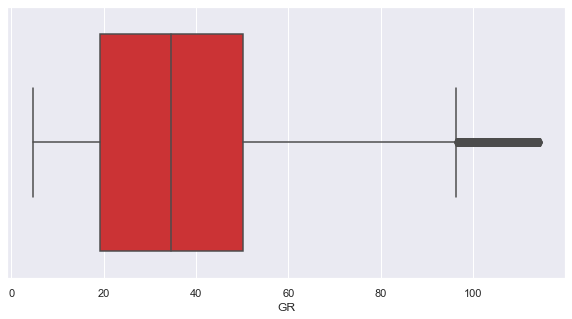

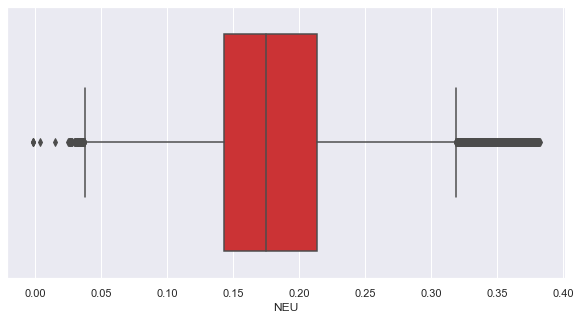

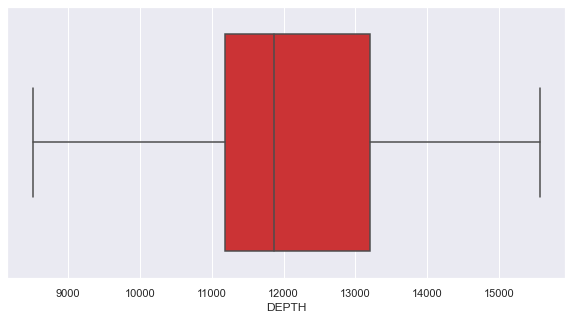

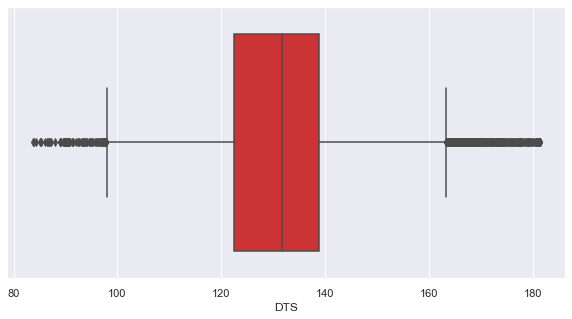

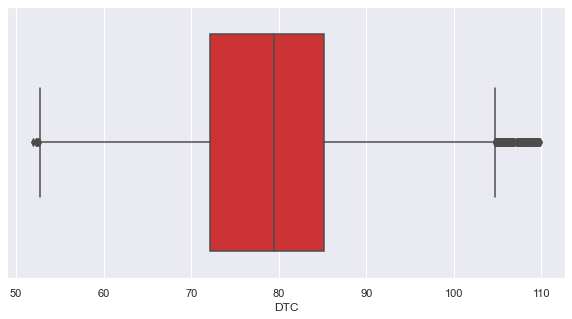

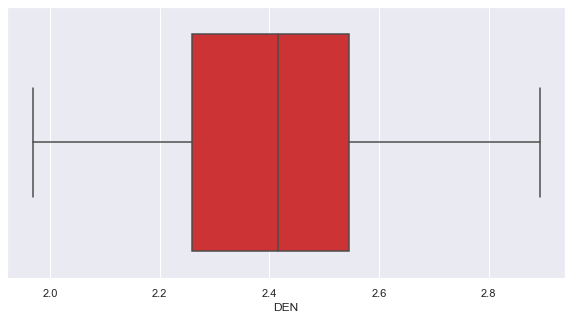

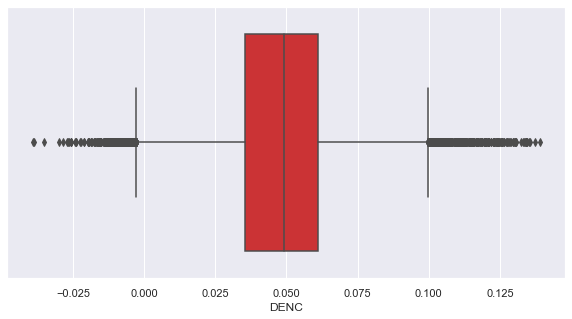

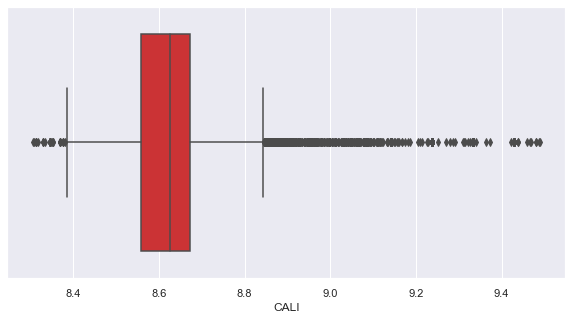

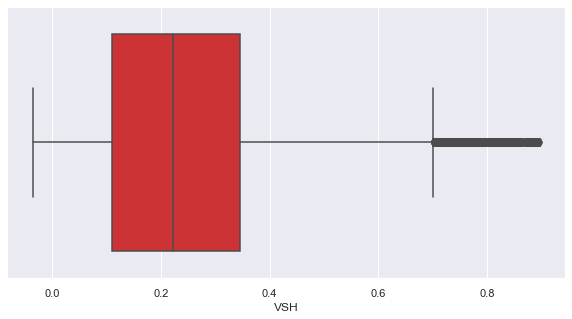

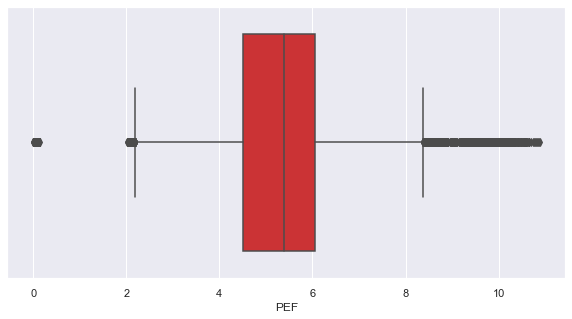

In [405]:
### Let us see the effects of outlier removal 

columns = ['RMED','RDEP','SW','PHIF','GR','NEU','DEPTH','DTS','DTC','DEN','DENC','CALI','VSH','PEF']
def plot_boxplots(rawd_zscore, cols):
    for col in cols:
        plt.figure(figsize = (10,5))
        sns.boxplot(col, data=rawd_zscore, palette="Set1")
        plt.show()

plot_boxplots(rawd_zscore, columns)

#### outliers have been significantly removed. 

In [406]:
rawdata_new.shape # Lets check the shape of rawdata_new and compare with rawd_zscore

(42072, 14)

In [407]:
rawd_zscore.shape ## A significant amount of the data has been removed; About 2781

(39291, 14)

### Percentile Method

In [408]:
# Let us define the maximum threshold for all the parameters
#max_threshold=rawdata_new.quantile(0.95)

In [409]:
#max_threshold

In [410]:
#min_threshold = rawdata_new.quantile(0.05)

In [411]:
#min_threshold

In [412]:
#rawdata_quant=rawdata_new[rawdata_new['']<max_threshold

In [413]:
#np_max_threshold=max_threshold.to_numpy()

In [414]:
#max_threshold_df=pd.DataFrame(np_max_threshold, columns=['Values'])

In [415]:
#max_threshold_df.head()

In [416]:
#max_threshold_df.rename(index={0:'RMED'})

In [417]:
#min_threshold_df.set_index("Logs", inplace = True)
#rawdata_new[rawdata_new['DEPTH']<max_threshold['name of the index','Name of the column with the values']]

In [418]:
#max_threshold.set_index("DEPTH", inplace = True)

In [419]:
### Continue later. 

In [420]:
#max_threshold.set_index("DEPTH", inplace = True)
#rawdata_new[rawdata_new['DEPTH']<max_threshold['name of the index','Name of the column with the values']]

In [421]:
#max_threshold.set_index("name of the index", inplace = True)
#rawdata_new[rawdata_new['DEPTH']<max_threshold['name of the index','Name of the column with the values']]

### Test Data Preparation

In [457]:
test= pd.read_csv('Test.csv')

In [458]:
test.shape

(11275, 14)

In [459]:
test.describe()

WELLNUM         DEPTH           DTC           DTS            BS  \
count  11275.000000  11275.000000  11275.000000  11275.000000  11275.000000   
mean     102.011086  12643.576541   -509.077755  -6479.740939      8.525942   
std        1.643594   2516.270914   2368.360461   4829.300710      0.310837   
min      100.000000  10177.500000  -9999.000000  -9999.000000      8.500000   
25%      100.000000  10869.500000     72.247600  -9999.000000      8.500000   
50%      101.000000  11343.000000     81.822500  -9999.000000      8.500000   
75%      104.000000  16034.250000     88.451850    139.140850      8.500000   
max      104.000000  17443.500000    125.394000    190.263000     12.250000   

               CALI           DEN          DENC            GR           NEU  \
count  11275.000000  11275.000000  11275.000000  11275.000000  11275.000000   
mean       8.534996    -70.324669    -72.694420     65.895769     -3.336822   
std        0.189920    849.853859    849.651005     56.261780    188.312731   
min        8.250000  -9999.000000  -9999.000000      3.985964  -9999.000000   
25%        8.358610      2.269458      0.003207     30.106430      0.163874   
50%        8.512500      2.443988      0.019000     53.767100      0.202947   
75%        8.651935      2.538193      0.041436     94.247650      0.241950   
max        9.314860      3.201297      0.192256   1711.420000      0.732381   

                PEF          RDEP          RMED           ROP  
count  11275.000000  11275.000000  11275.000000  11275.000000  
mean     -68.613773    -36.236767    -32.681697  -4303.156711  
std      850.001489    867.608657    879.483078   4976.927245  
min    -9999.000000  -9999.000000  -9999.000000  -9999.000000  
25%        3.064271      1.719360      1.685470  -9999.000000  
50%        3.892648      2.839570      2.732343     19.016170  
75%        5.017876      8.112067      7.816489     28.633825  
max       15.135460   5000.000000   5000.000000    300.110700

In [460]:
test.isna().sum()

WELLNUM    0
DEPTH      0
DTC        0
DTS        0
BS         0
CALI       0
DEN        0
DENC       0
GR         0
NEU        0
PEF        0
RDEP       0
RMED       0
ROP        0
dtype: int64

In [461]:
test.head(20)

WELLNUM    DEPTH       DTC     DTS   BS      CALI       DEN      DENC  \
0       100  15912.5  65.46309 -9999.0  8.5  8.275658  2.545791  0.051429   
1       100  15913.0  64.56976 -9999.0  8.5  8.275658  2.524871  0.043547   
2       100  15913.5  64.43656 -9999.0  8.5  8.275658  2.507431  0.037683   
3       100  15914.0  65.03485 -9999.0  8.5  8.275658  2.575224  0.064832   
4       100  15914.5  65.13235 -9999.0  8.5  8.286819  2.550074  0.017329   
5       100  15915.0  64.32072 -9999.0  8.5  8.286819  2.550074  0.017329   
6       100  15915.5  63.38940 -9999.0  8.5  8.286819  2.550074  0.017329   
7       100  15916.0  65.38040 -9999.0  8.5  8.334252  2.550074  0.017329   
8       100  15916.5  68.65218 -9999.0  8.5  8.334252  2.550074  0.017329   
9       100  15917.0  69.54514 -9999.0  8.5  8.334252  2.548068  0.014733   
10      100  15917.5  68.60525 -9999.0  8.5  8.334252  2.521573  0.008567   
11      100  15918.0  67.52716 -9999.0  8.5  8.334252  2.512146  0.005861   
12      100  15918.5  67.51904 -9999.0  8.5  8.334252  2.506344  0.005364   
13      100  15919.0  68.33866 -9999.0  8.5  8.334252  2.555627  0.016437   
14      100  15919.5  69.07109 -9999.0  8.5  8.334252  2.554492  0.016092   
15      100  15920.0  66.88498 -9999.0  8.5  8.334252  2.573347  0.018994   
16      100  15920.5  63.41720 -9999.0  8.5  8.334252  2.530424  0.181166   
17      100  15921.0  65.60278 -9999.0  8.5  8.334252  2.554725  0.160612   
18      100  15921.5  70.03943 -9999.0  8.5  8.334252  2.556137  0.165032   
19      100  15922.0  71.10633 -9999.0  8.5  8.334252  2.520804  0.174289   

           GR       NEU       PEF      RDEP      RMED       ROP  
0    9.791040  0.134139  5.858729  2.881351  2.645010  262.2817  
1   11.278870  0.111488  6.021325  2.881351  2.645010  262.0370  
2    9.954506  0.112143  6.060280  3.027379  2.928987  261.9881  
3    8.630137  0.114846  6.202412  3.054653  2.974949  261.7196  
4    7.305769  0.116967  5.179704  3.054653  2.974949  261.5247  
5    8.467904  0.116962  5.179704  3.045108  2.975753  261.4274  
6    9.630041  0.125625  5.179704  3.045360  2.968783  261.4274  
7   10.792180  0.136781  5.179704  3.045360  2.968783  261.1357  
8   11.267710  0.136785  5.179704  3.047688  2.979694  261.1843  
9   11.743250  0.120607  5.188026  3.061228  2.970245  261.0872  
10  12.218780  0.150648  5.458715  3.061228  2.970245  261.1357  
11  10.605690  0.151125  5.498665  3.175435  3.089566  261.0144  
12   8.992600  0.118764  5.515079  3.168165  3.087062  261.0386  
13   7.379510  0.115217  5.558053  3.168165  3.087062  261.0872  
14   9.607334  0.115261  5.566368  3.192024  3.091526  260.9659  
15  11.835160  0.114733  5.552020  3.180324  3.095541  261.0629  
16  14.062980  0.101274  9.182672  3.180324  3.095541  260.9659  
17  13.134950  0.100449  9.134381  3.202909  3.052524  260.9659  
18  12.206910  0.119712  9.064433  3.222303  3.105678  260.8932  
19  11.278870  0.126365  9.148151  3.222303  3.105678  260.9659

##### Clean Test Data

In [462]:
test.replace(['-9999', -9999], np.nan, inplace=True) # replacinhg all -999 values with nan

In [463]:
test.isna().sum()

WELLNUM       0
DEPTH         0
DTC         661
DTS        7364
BS            0
CALI          0
DEN          82
DENC         82
GR            0
NEU           4
PEF          82
RDEP         77
RMED         77
ROP        4881
dtype: int64

In [464]:
test.shape

(11275, 14)

<AxesSubplot:>

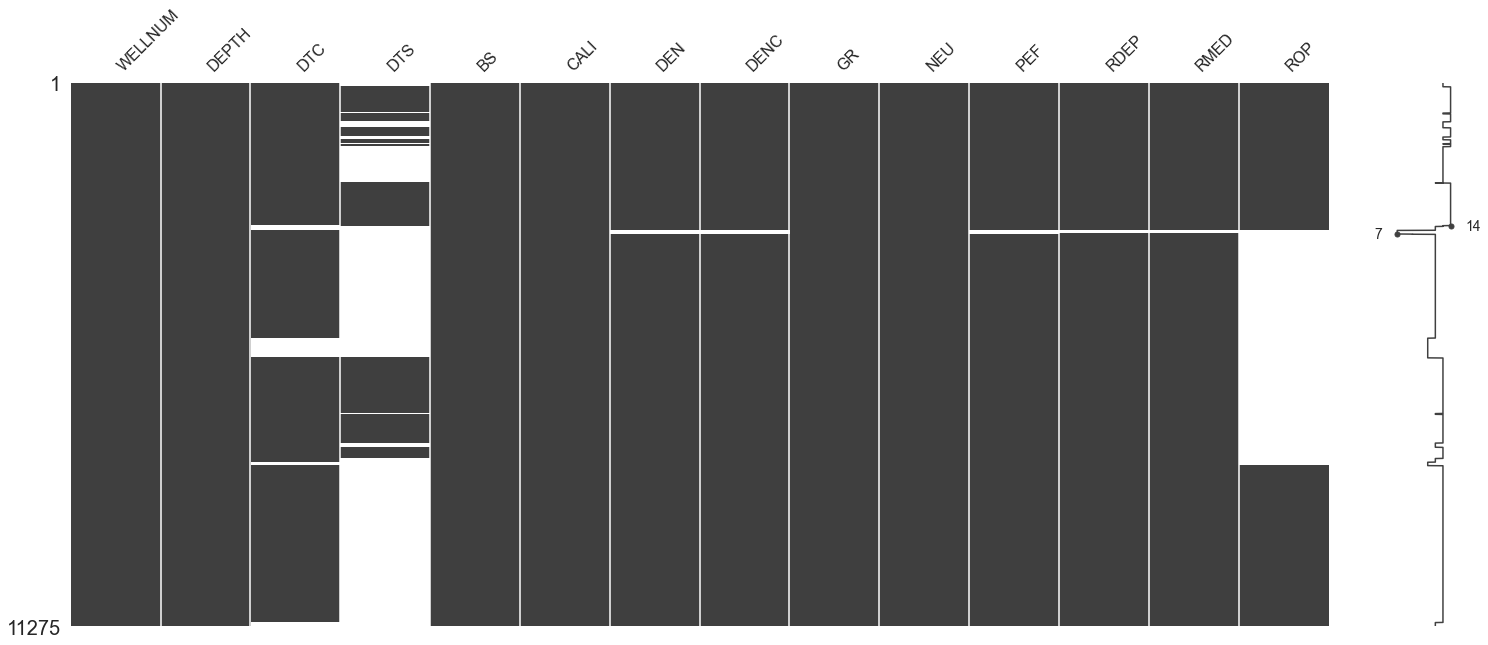

In [465]:
# Let us visualize the missing values
sns.set()
msno.matrix(test)

In [466]:
# Determine the percentage of missing variables
total = test.isnull().sum().sort_values(ascending=False)
percent1 = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total, percent1], axis=1, keys=['Total', 'Percent'])
missing_data1.head(18)

Total   Percent
DTS       7364  0.653126
ROP       4881  0.432905
DTC        661  0.058625
DEN         82  0.007273
DENC        82  0.007273
PEF         82  0.007273
RDEP        77  0.006829
RMED        77  0.006829
NEU          4  0.000355
WELLNUM      0  0.000000
DEPTH        0  0.000000
BS           0  0.000000
CALI         0  0.000000
GR           0  0.000000

#### Missing values
1.  Missing values can be found in DTS, ROP, and DTC; and minute missing values PEF,RDEP, RMED, DEN, DENC
2. We would remove minute missing values, and predict major missing values

In [467]:
test_raw=test.copy(deep= True)

In [468]:
colss= ['DEN', 'DENC', 'PEF','RDEP','RMED','NEU']
test_raw.dropna(axis=0, subset=colss, inplace=True)
test_raw.shape

(11189, 14)

In [469]:
test_raw.isna().sum()

WELLNUM       0
DEPTH         0
DTC         661
DTS        7279
BS            0
CALI          0
DEN           0
DENC          0
GR            0
NEU           0
PEF           0
RDEP          0
RMED          0
ROP        4799
dtype: int64

In [470]:
# We would employ the same prediction methodology to predict the missing values

In [471]:
# Let us visualize the correlations between the dataset

<AxesSubplot:>

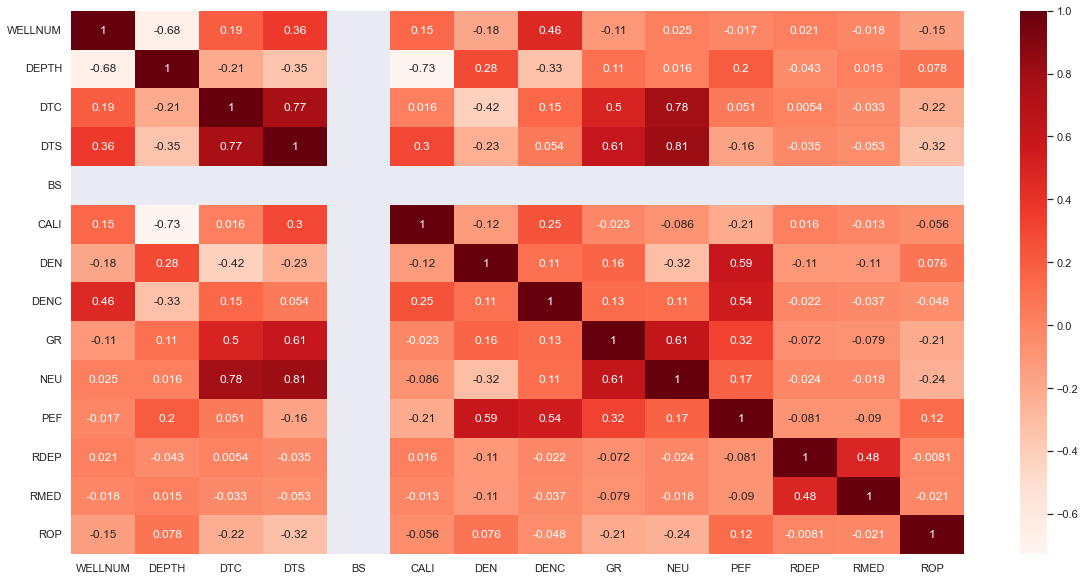

In [472]:
plt.figure(figsize=(20,10))
sns.heatmap(test_raw.corr(),cbar=True,annot=True,cmap='Reds')

In [473]:
test_raw_1=test_raw.copy(deep= True) # Creating a new copy of test_raw for machine learning predictions

In [474]:
test_raw_1.shape

(11189, 14)

#### Predicting ROP

In [475]:
# Let us select the predictor varibles 

In [476]:
predictions_ROP=test_raw_1[['DEPTH','CALI','DEN','DENC','GR','NEU','PEF','RMED','ROP']] 

In [477]:
predictions_ROP.shape

(11189, 9)

In [488]:
predictions_ROP.isna().sum()

DEPTH       0
CALI        0
DEN         0
DENC        0
GR          0
NEU         0
PEF         0
RMED        0
ROP      4799
dtype: int64

##### Now lets create a training and a test dataset from the predictions_ROP data

In [480]:
filt_ROP=predictions_ROP[predictions_ROP["ROP"].isna()]

In [483]:
filt_ROP.head() # Dataframe with all ROP values NAN. This would be our test data set to predict the missing ROP values

DEPTH     CALI       DEN      DENC       GR       NEU       PEF  \
3145  10218.5  8.70919  2.584699  0.003293  115.401  0.214415  4.252896   
3146  10219.0  8.75133  2.586329  0.006636  114.884  0.210748  4.257574   
3147  10219.5  8.79208  2.575483  0.004756  113.567  0.213433  4.495082   
3148  10220.0  8.81561  2.581007  0.005788  110.824  0.217517  4.631030   
3149  10220.5  8.85909  2.605313  0.015330  110.633  0.214221  4.845959   

         RMED  ROP  
3145  2.01643  NaN  
3146  2.05382  NaN  
3147  2.05303  NaN  
3148  1.84237  NaN  
3149  1.57346  NaN

In [484]:
filt_ROP.shape

(4799, 9)

In [485]:
predictions_ROP_train= predictions_ROP.dropna(how='any', inplace=False) # This would be our train dataset with no NAN values

In [486]:
predictions_ROP_train.isna().sum()

DEPTH    0
CALI     0
DEN      0
DENC     0
GR       0
NEU      0
PEF      0
RMED     0
ROP      0
dtype: int64

In [498]:
#predictions_ROP_train.head()

In [487]:
predictions_ROP_train.shape

(6390, 9)

In [490]:
filt_ROP.columns

Index(['DEPTH', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RMED', 'ROP'], dtype='object')

In [491]:
test_ROP=filt_ROP[['DEPTH', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RMED']]

In [499]:
#test_ROP.head()

In [494]:
test_ROP.shape

(4799, 8)

In [530]:
#from sklearn.linear_model import LinearRegression
from sklearn import neighbors 
linreg_1 = neighbors.KNeighborsRegressor(n_neighbors = 10) # We use KNN to predict the missing values

In [531]:
train_ROP_x=predictions_ROP_train[['DEPTH', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RMED']]

In [532]:
train_ROP_y=predictions_ROP_train[['ROP']]

In [546]:
# Scale the predictors

#scaler = StandardScaler()

#train_ROP_x_scaled = scaler.fit_transform(train_ROP_x)

In [547]:
train_ROP_x=train_ROP_x.to_numpy()

In [548]:
y_train_ROP=train_ROP_y.to_numpy()

In [549]:
linreg_1.fit(train_ROP_x,y_train_ROP)

KNeighborsRegressor(n_neighbors=10)

In [550]:
pred_train_y=linreg_1.predict(train_ROP_x)

In [551]:
from sklearn import neighbors # importing K nearest neighbours
from sklearn.metrics import mean_squared_error # importing RMSE
from math import sqrt

In [552]:
training_R2 = linreg_1.score(train_ROP_x, y_train_ROP)
print(training_R2)

0.9933995579295725


In [553]:
RMSE_ROP= sqrt(mean_squared_error(y_train_ROP, pred_train_y))
RMSE_ROP

4.597264621981781

In [556]:
x_test_ROP=test_ROP.to_numpy()

In [557]:
predicted_ROP=linreg_1.predict(x_test_ROP)

In [558]:
predicted_ROP_df= pd.DataFrame(predicted_ROP)

In [559]:
predicted_ROP_df

0
0     14.909412
1     14.909412
2     14.909412
3     14.909412
4     14.909412
...         ...
4794  50.154996
4795  50.154996
4796  50.154996
4797  50.154996
4798  50.154996

[4799 rows x 1 columns]

In [560]:
predicted_ROP_df.isna().sum()

0    0
dtype: int64

In [561]:
predicted_ROP_df_list=predicted_ROP_df.values.tolist()

In [562]:
len(predicted_ROP_df_list)

4799

In [564]:
test_raw_1.loc[test_raw_1.ROP.isna(),'ROP']=predicted_ROP_df_list

In [565]:
test_raw_1.isna().sum()

WELLNUM       0
DEPTH         0
DTC         661
DTS        7279
BS            0
CALI          0
DEN           0
DENC          0
GR            0
NEU           0
PEF           0
RDEP          0
RMED          0
ROP           0
dtype: int64

In [566]:
### All ROP missing values have been inputed. 
### Repeat the process for DTC and DTS

##### Predicting DTS

In [571]:
predictions_DTS=test_raw_1[['DEPTH','CALI','DEN','DENC','GR','NEU','PEF','RMED','DTS']] 

In [574]:
filt_DTS=predictions_DTS[predictions_DTS["DTS"].isna()]

predictions_DTS_train= predictions_DTS.dropna(how='any', inplace=False) # This would be our train dataset with no NAN values

#from sklearn.linear_model import LinearRegression
from sklearn import neighbors 
linreg_2 = neighbors.KNeighborsRegressor(n_neighbors = 10) # We use KNN to predict the missing values

train_DTS_x=predictions_DTS_train[['DEPTH', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RMED']]

train_DTS_y=predictions_DTS_train[['DTS']]

In [575]:
test_DTS=filt_DTS[['DEPTH', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RMED']]

In [576]:
x_train_DTS=train_DTS_x.to_numpy()
y_train_DTS=train_DTS_y.to_numpy()

linreg_2.fit(x_train_DTS,y_train_DTS)

KNeighborsRegressor(n_neighbors=10)

In [577]:
x_test_DTS=test_DTS.to_numpy()

predicted_DTS=linreg_2.predict(x_test_DTS)


In [578]:
predicted_DTS_df= pd.DataFrame(predicted_DTS)

In [579]:
predicted_DTS_df.isna().sum()

0    0
dtype: int64

In [580]:
predicted_DTS_df_list=predicted_DTS_df.values.tolist()

In [582]:
test_raw_1.loc[test_raw_1.DTS.isna(),'DTS']=predicted_DTS_df_list

In [583]:
test_raw_1.isna().sum()

WELLNUM      0
DEPTH        0
DTC        661
DTS          0
BS           0
CALI         0
DEN          0
DENC         0
GR           0
NEU          0
PEF          0
RDEP         0
RMED         0
ROP          0
dtype: int64

#### Predicting DTC

In [584]:
predictions_DTC=test_raw_1[['DEPTH','CALI','DEN','DENC','GR','NEU','PEF','RMED','DTC']] 

In [585]:
filt_DTC=predictions_DTC[predictions_DTC["DTC"].isna()]

predictions_DTC_train= predictions_DTC.dropna(how='any', inplace=False) # This would be our train dataset with no NAN values

#from sklearn.linear_model import LinearRegression
from sklearn import neighbors 
linreg_3 = neighbors.KNeighborsRegressor(n_neighbors = 10) # We use KNN to predict the missing values

train_DTC_x=predictions_DTC_train[['DEPTH', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RMED']]

train_DTC_y=predictions_DTC_train[['DTC']]

In [588]:
test_DTC=filt_DTC[['DEPTH', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RMED']]

In [589]:
x_train_DTC=train_DTC_x.to_numpy()
y_train_DTC=train_DTC_y.to_numpy()

linreg_3.fit(x_train_DTC,y_train_DTC)

KNeighborsRegressor(n_neighbors=10)

In [590]:
x_test_DTC=test_DTC.to_numpy()

predicted_DTC=linreg_3.predict(x_test_DTC)


In [591]:
predicted_DTC_df= pd.DataFrame(predicted_DTC)

In [592]:
predicted_DTC_df.isna().sum()

0    0
dtype: int64

In [593]:
predicted_DTC_df_list=predicted_DTC_df.values.tolist()

In [594]:
len(predicted_DTC_df_list)

661

In [595]:
test_raw_1.loc[test_raw_1.DTC.isna(),'DTC']=predicted_DTC_df_list

In [596]:
test_raw_1.isna().sum()

WELLNUM    0
DEPTH      0
DTC        0
DTS        0
BS         0
CALI       0
DEN        0
DENC       0
GR         0
NEU        0
PEF        0
RDEP       0
RMED       0
ROP        0
dtype: int64

In [597]:
### We have inputed all missing data

### MODELLING

##### METHODLOGY 

We would address the modelling in three ways using different sets and identify the effects of different variables. 

1. MULTI-TARGET REGRESSION: We would predict all three target variables at the same time. 

Data_Types:
a. We would use rawdata_new (has no missing values but outliers has not been addressed), rawd_zscore: addressed for outliers AND rawd_log-addressed for outliers with log transformation. 

b. We would use data with missing values and an algorithm that accomodates missing values. 

In both cases, different machine learning algorithms would be explored. 

#### BOOSTING RESULTS
1. We would explore Feature Engineering, Feature Selection and PCA to improve or boost the best performing algorithms in a. and b. above

EXTRAS
1- Other approaches would be explored depending on the results achieved.

### Regression with rawdata_new

In [416]:
Train_data=rawdata_new.copy()

In [417]:
Train_data.head()

RMED    RDEP   SW  PHIF        GR       NEU         DEPTH  \
27573  2.4927  2.6310  1.0   0.0   88.8573  0.277790  14121.660105   
27574  2.4685  2.4760  1.0   0.0  120.8949  0.294806  14122.160105   
27575  2.3742  2.4359  1.0   0.0  153.5195  0.447361  14122.660105   
27576  2.4142  2.4065  1.0   0.0  182.8531  0.579637  14123.160105   
27577  2.4077  2.3365  1.0   0.0  256.1960  0.556317  14123.660105   

              DTS       DTC     DEN      DENC    CALI       VSH       PEF  
27573  165.060293   89.6461  2.5777  0.156224  9.9048  0.751631  0.156224  
27574  176.704943   96.0152  2.4748  0.168483  9.9912  1.032475  0.168483  
27575  181.488756  104.0457  2.3338  0.170015  9.9048  1.312757  0.170015  
27576  197.532364  113.5010  2.2358  0.170992  9.9048  1.682292  0.170992  
27577  190.950676  117.7817  2.2278  0.195121  9.8095  1.924398  0.195121

In [418]:
Train_data.isna().sum()

RMED     0
RDEP     0
SW       0
PHIF     0
GR       0
NEU      0
DEPTH    0
DTS      0
DTC      0
DEN      0
DENC     0
CALI     0
VSH      0
PEF      0
dtype: int64

In [419]:
Train_data.shape

(42072, 14)

In [420]:
Train_data.describe()

RMED          RDEP            SW          PHIF            GR  \
count  42072.000000  42072.000000  42072.000000  42072.000000  42072.000000   
mean     751.817593     25.201381      0.669053      0.141716     39.925769   
std     6637.276219    440.405525      0.354409      0.081228     24.868544   
min        0.139400      0.129500      0.013000      0.000000      4.588597   
25%        1.523700      1.475500      0.300000      0.068200     20.020650   
50%        3.286912      2.785450      0.813400      0.141000     35.851850   
75%       10.936625      9.130000      1.000000      0.217000     52.064752   
max    62290.800000  80266.800000      1.000000      0.403294    304.333700   

                NEU         DEPTH           DTS           DTC           DEN  \
count  42072.000000  42072.000000  42072.000000  42072.000000  42072.000000   
mean       0.181695  12240.953306    132.391340     78.808356      2.411121   
std        0.066884   1606.343891     16.339841     10.339959      0.160803   
min       -0.003400   8494.000000     74.822400      1.025100      1.626600   
25%        0.144200  11187.660000    122.970506     72.223375      2.264300   
50%        0.176500  11903.540000    132.218136     79.579022      2.419700   
75%        0.215700  13349.492500    140.118915     85.396675      2.544321   
max        0.862567  15566.930000    259.713583    123.253500      3.089600   

               DENC          CALI           VSH           PEF  
count  42072.000000  42072.000000  42072.000000  42072.000000  
mean       0.049676      8.662779      0.275740      4.958843  
std        0.030605      0.279899      0.207018      1.979067  
min       -0.487100      8.304600     -0.248000     -0.013100  
25%        0.035602      8.556900      0.113200      4.431075  
50%        0.049300      8.625000      0.233000      5.358870  
75%        0.062000      8.671900      0.360625      6.056600  
max        0.283083     11.904800      2.460104     13.356600

In [421]:
Train_data.columns

Index(['RMED', 'RDEP', 'SW', 'PHIF', 'GR', 'NEU', 'DEPTH', 'DTS', 'DTC', 'DEN',
       'DENC', 'CALI', 'VSH', 'PEF'],
      dtype='object')

In [422]:
first_column= Train_data.pop('VSH')
second_column= Train_data.pop('PHIF')
third_column= Train_data.pop('SW')

In [423]:
Train_data.head()

RMED    RDEP        GR       NEU         DEPTH         DTS       DTC  \
27573  2.4927  2.6310   88.8573  0.277790  14121.660105  165.060293   89.6461   
27574  2.4685  2.4760  120.8949  0.294806  14122.160105  176.704943   96.0152   
27575  2.3742  2.4359  153.5195  0.447361  14122.660105  181.488756  104.0457   
27576  2.4142  2.4065  182.8531  0.579637  14123.160105  197.532364  113.5010   
27577  2.4077  2.3365  256.1960  0.556317  14123.660105  190.950676  117.7817   

          DEN      DENC    CALI       PEF  
27573  2.5777  0.156224  9.9048  0.156224  
27574  2.4748  0.168483  9.9912  0.168483  
27575  2.3338  0.170015  9.9048  0.170015  
27576  2.2358  0.170992  9.9048  0.170992  
27577  2.2278  0.195121  9.8095  0.195121

In [424]:
Train_data.insert(11, 'VSH', first_column)
Train_data.insert(12, 'PHIF', second_column)
Train_data.insert(13, 'SW', third_column)

In [425]:
Train_data

RMED      RDEP         GR       NEU         DEPTH         DTS  \
27573   2.492700  2.631000   88.85730  0.277790  14121.660105  165.060293   
27574   2.468500  2.476000  120.89490  0.294806  14122.160105  176.704943   
27575   2.374200  2.435900  153.51950  0.447361  14122.660105  181.488756   
27576   2.414200  2.406500  182.85310  0.579637  14123.160105  197.532364   
27577   2.407700  2.336500  256.19600  0.556317  14123.660105  190.950676   
...          ...       ...        ...       ...           ...         ...   
318962  3.646631  4.081079   32.91600  0.109335  12142.500000  112.350226   
318963  3.936356  4.120065   28.76523  0.099368  12143.000000  109.551484   
318964  4.245169  4.662224   25.70403  0.097774  12143.500000  107.615494   
318965  4.372118  4.810604   22.94222  0.089295  12144.000000  106.194045   
318966  4.481858  4.844858   22.30438  0.091876  12144.500000  106.350038   

              DTC       DEN      DENC      CALI       PEF       VSH      PHIF  \
27573    89.64610  2.577700  0.156224  9.904800  0.156224  0.751631  0.000000   
27574    96.01520  2.474800  0.168483  9.991200  0.168483  1.032475  0.000000   
27575   104.04570  2.333800  0.170015  9.904800  0.170015  1.312757  0.000000   
27576   113.50100  2.235800  0.170992  9.904800  0.170992  1.682292  0.000000   
27577   117.78170  2.227800  0.195121  9.809500  0.195121  1.924398  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
318962   64.57612  2.613020  0.026474  8.550179  5.207650  0.273600  0.028313   
318963   66.20669  2.614332  0.024994  8.520521  5.230460  0.234400  0.027530   
318964   67.43187  2.620479  0.027400  8.521563  5.335860  0.205400  0.023795   
318965   66.56465  2.623435  0.027175  8.522397  5.346350  0.179300  0.022048   
318966   66.92158  2.617516  0.027610  8.513542  5.463550  0.173300  0.025602   

         SW  
27573   1.0  
27574   1.0  
27575   1.0  
27576   1.0  
27577   1.0  
...     ...  
318962  1.0  
318963  1.0  
318964  1.0  
318965  1.0  
318966  1.0  

[42072 rows x 14 columns]

In [426]:
Train_data.isna().sum()

RMED     0
RDEP     0
GR       0
NEU      0
DEPTH    0
DTS      0
DTC      0
DEN      0
DENC     0
CALI     0
PEF      0
VSH      0
PHIF     0
SW       0
dtype: int64

In [427]:
#Train_data.SW.unique

In [428]:
Train_data.columns

Index(['RMED', 'RDEP', 'GR', 'NEU', 'DEPTH', 'DTS', 'DTC', 'DEN', 'DENC',
       'CALI', 'PEF', 'VSH', 'PHIF', 'SW'],
      dtype='object')

In [429]:
# Separate the predictors from the target variables.
predictors=Train_data[['RMED', 'RDEP', 'GR', 'NEU', 'DEPTH', 'DTS', 'DTC', 'DEN', 'DENC','CALI', 'PEF']]
targets=Train_data[['VSH', 'PHIF', 'SW']]

In [430]:
targets.head()

VSH  PHIF   SW
27573  0.751631   0.0  1.0
27574  1.032475   0.0  1.0
27575  1.312757   0.0  1.0
27576  1.682292   0.0  1.0
27577  1.924398   0.0  1.0

In [431]:
targets.isna().sum()

VSH     0
PHIF    0
SW      0
dtype: int64

##### Scaling the data

In [432]:
from sklearn.preprocessing import StandardScaler

scaler_s = StandardScaler()

predictors_num= predictors[['RMED', 'RDEP', 'GR', 'NEU', 'DEPTH', 'DTS', 'DTC', 'DEN', 'DENC','CALI', 'PEF']].to_numpy()                    
predictors_scaled = scaler_s.fit_transform(predictors_num)                              
predictors_scaled_df = pd.DataFrame (predictors_scaled, columns = ['RMED', 'RDEP', 'GR', 'NEU', 'DEPTH', 'DTS', 'DTC', 'DEN', 'DENC','CALI', 'PEF']) 

In [433]:
predictors_scaled_df.head()

RMED      RDEP        GR       NEU     DEPTH       DTS       DTC  \
0 -0.112898 -0.051250  1.967631  1.436756  1.170814  1.999367  1.048154   
1 -0.112901 -0.051602  3.255924  1.691169  1.171125  2.712029  1.664131   
2 -0.112916 -0.051693  4.567822  3.972075  1.171436  3.004803  2.440788   
3 -0.112910 -0.051759  5.747382  5.949782  1.171747  3.986685  3.355241   
4 -0.112911 -0.051918  8.696641  5.601116  1.172059  3.583880  3.769242   

        DEN      DENC      CALI       PEF  
0  1.035931  3.481439  4.437438 -2.426737  
1  0.396012  3.881986  4.746125 -2.420543  
2 -0.480845  3.932047  4.437438 -2.419769  
3 -1.090292  3.963964  4.437438 -2.419275  
4 -1.140043  4.752382  4.096955 -2.407083

In [434]:
predictors_scaled_df.isna().sum()

RMED     0
RDEP     0
GR       0
NEU      0
DEPTH    0
DTS      0
DTC      0
DEN      0
DENC     0
CALI     0
PEF      0
dtype: int64

In [435]:
predictors_scaled_df.shape

(42072, 11)

<AxesSubplot:title={'center':'After Standard Scaler'}, xlabel='RMED', ylabel='Density'>

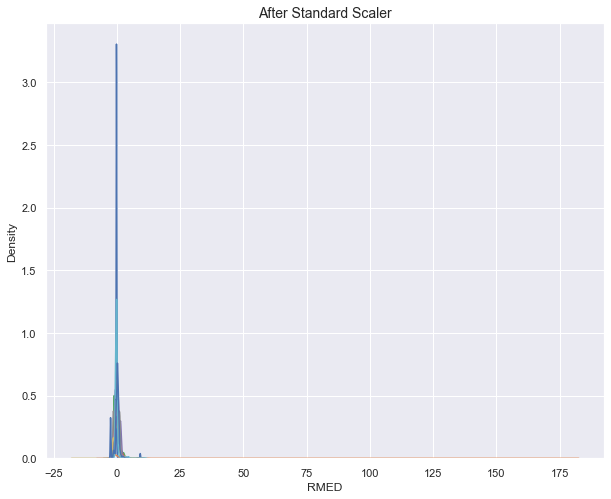

In [436]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))

ax1.set_title('After Standard Scaler', fontsize = 14)
sns.kdeplot(predictors_scaled_df['RMED'], ax=ax1)
sns.kdeplot(predictors_scaled_df['RDEP'], ax=ax1)
sns.kdeplot(predictors_scaled_df['GR'], ax=ax1)
sns.kdeplot(predictors_scaled_df['NEU'], ax=ax1)
sns.kdeplot(predictors_scaled_df['DEPTH'], ax=ax1)
sns.kdeplot(predictors_scaled_df['DTS'], ax=ax1)
sns.kdeplot(predictors_scaled_df['DTC'], ax=ax1)
sns.kdeplot(predictors_scaled_df['DEN'], ax=ax1)
sns.kdeplot(predictors_scaled_df['DENC'], ax=ax1)
sns.kdeplot(predictors_scaled_df['CALI'], ax=ax1)
sns.kdeplot(predictors_scaled_df['PEF'], ax=ax1)



In [437]:
targets.head()

VSH  PHIF   SW
27573  0.751631   0.0  1.0
27574  1.032475   0.0  1.0
27575  1.312757   0.0  1.0
27576  1.682292   0.0  1.0
27577  1.924398   0.0  1.0

In [438]:
VSH_raw = targets[['VSH']].to_numpy() # Creating unscaled output as a separate numpy array
VSH_raw_df = pd.DataFrame(VSH_raw , columns = ['VSH'])# Converting it to a pandas dataframe
predictors_scaled_df['VSH'] = VSH_raw_df

In [439]:
predictors_scaled_df.head()

RMED      RDEP        GR       NEU     DEPTH       DTS       DTC  \
0 -0.112898 -0.051250  1.967631  1.436756  1.170814  1.999367  1.048154   
1 -0.112901 -0.051602  3.255924  1.691169  1.171125  2.712029  1.664131   
2 -0.112916 -0.051693  4.567822  3.972075  1.171436  3.004803  2.440788   
3 -0.112910 -0.051759  5.747382  5.949782  1.171747  3.986685  3.355241   
4 -0.112911 -0.051918  8.696641  5.601116  1.172059  3.583880  3.769242   

        DEN      DENC      CALI       PEF       VSH  
0  1.035931  3.481439  4.437438 -2.426737  0.751631  
1  0.396012  3.881986  4.746125 -2.420543  1.032475  
2 -0.480845  3.932047  4.437438 -2.419769  1.312757  
3 -1.090292  3.963964  4.437438 -2.419275  1.682292  
4 -1.140043  4.752382  4.096955 -2.407083  1.924398

In [440]:
PHIF_raw = targets[['PHIF']].to_numpy() # Creating unscaled output as a separate numpy array
PHIF_raw_df = pd.DataFrame(PHIF_raw , columns = ['PHIF'])# Converting it to a pandas dataframe
predictors_scaled_df['PHIF'] = PHIF_raw_df

In [441]:
predictors_scaled_df.head()

RMED      RDEP        GR       NEU     DEPTH       DTS       DTC  \
0 -0.112898 -0.051250  1.967631  1.436756  1.170814  1.999367  1.048154   
1 -0.112901 -0.051602  3.255924  1.691169  1.171125  2.712029  1.664131   
2 -0.112916 -0.051693  4.567822  3.972075  1.171436  3.004803  2.440788   
3 -0.112910 -0.051759  5.747382  5.949782  1.171747  3.986685  3.355241   
4 -0.112911 -0.051918  8.696641  5.601116  1.172059  3.583880  3.769242   

        DEN      DENC      CALI       PEF       VSH  PHIF  
0  1.035931  3.481439  4.437438 -2.426737  0.751631   0.0  
1  0.396012  3.881986  4.746125 -2.420543  1.032475   0.0  
2 -0.480845  3.932047  4.437438 -2.419769  1.312757   0.0  
3 -1.090292  3.963964  4.437438 -2.419275  1.682292   0.0  
4 -1.140043  4.752382  4.096955 -2.407083  1.924398   0.0

In [442]:
SW_raw = targets[['SW']].to_numpy() # Creating unscaled output as a separate numpy array
SW_raw_df = pd.DataFrame(SW_raw , columns = ['SW'])# Converting it to a pandas dataframe
predictors_scaled_df['SW'] = SW_raw_df

In [443]:
predictors_scaled_df.head()

RMED      RDEP        GR       NEU     DEPTH       DTS       DTC  \
0 -0.112898 -0.051250  1.967631  1.436756  1.170814  1.999367  1.048154   
1 -0.112901 -0.051602  3.255924  1.691169  1.171125  2.712029  1.664131   
2 -0.112916 -0.051693  4.567822  3.972075  1.171436  3.004803  2.440788   
3 -0.112910 -0.051759  5.747382  5.949782  1.171747  3.986685  3.355241   
4 -0.112911 -0.051918  8.696641  5.601116  1.172059  3.583880  3.769242   

        DEN      DENC      CALI       PEF       VSH  PHIF   SW  
0  1.035931  3.481439  4.437438 -2.426737  0.751631   0.0  1.0  
1  0.396012  3.881986  4.746125 -2.420543  1.032475   0.0  1.0  
2 -0.480845  3.932047  4.437438 -2.419769  1.312757   0.0  1.0  
3 -1.090292  3.963964  4.437438 -2.419275  1.682292   0.0  1.0  
4 -1.140043  4.752382  4.096955 -2.407083  1.924398   0.0  1.0

In [444]:
train_new=predictors_scaled_df.copy()

In [445]:
train_new.head()

RMED      RDEP        GR       NEU     DEPTH       DTS       DTC  \
0 -0.112898 -0.051250  1.967631  1.436756  1.170814  1.999367  1.048154   
1 -0.112901 -0.051602  3.255924  1.691169  1.171125  2.712029  1.664131   
2 -0.112916 -0.051693  4.567822  3.972075  1.171436  3.004803  2.440788   
3 -0.112910 -0.051759  5.747382  5.949782  1.171747  3.986685  3.355241   
4 -0.112911 -0.051918  8.696641  5.601116  1.172059  3.583880  3.769242   

        DEN      DENC      CALI       PEF       VSH  PHIF   SW  
0  1.035931  3.481439  4.437438 -2.426737  0.751631   0.0  1.0  
1  0.396012  3.881986  4.746125 -2.420543  1.032475   0.0  1.0  
2 -0.480845  3.932047  4.437438 -2.419769  1.312757   0.0  1.0  
3 -1.090292  3.963964  4.437438 -2.419275  1.682292   0.0  1.0  
4 -1.140043  4.752382  4.096955 -2.407083  1.924398   0.0  1.0

In [446]:
train_new.isna().sum() # Enduring that there is no missing data

RMED     0
RDEP     0
GR       0
NEU      0
DEPTH    0
DTS      0
DTC      0
DEN      0
DENC     0
CALI     0
PEF      0
VSH      0
PHIF     0
SW       0
dtype: int64

In [447]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [448]:
X = train_new[['RMED', 'RDEP', 'GR', 'NEU', 'DEPTH', 'DTS', 'DTC', 'DEN', 'DENC',
       'CALI', 'PEF']]
y = train_new[['VSH', 'PHIF', 'SW']]

In [449]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0) 
# split the training data into train and test split. 

In [450]:
y_train.head()

VSH    PHIF      SW
9960   0.605200  0.0914  0.9178
23551  0.089000  0.2270  0.1060
29657  0.241000  0.0760  1.0000
8709   0.290200  0.1409  0.9076
54     0.776957  0.0000  1.0000

In [451]:
print("TRAINING DATA")
print("Size of x_train is:", X_train.shape)
print("Size of y_train is:", y_train.shape)
print("VALIDATION DATA")
print("Size of X_val is:", X_val.shape)
print("Size of y_val is:", y_val.shape)

TRAINING DATA
Size of x_train is: (33657, 11)
Size of y_train is: (33657, 3)
VALIDATION DATA
Size of X_val is: (8415, 11)
Size of y_val is: (8415, 3)


In [453]:
X_col = ['RMED', 'RDEP', 'GR', 'NEU', 'DEPTH', 'DTS', 'DTC', 'DEN', 'DENC',
       'CALI', 'PEF']
y_col = ['VSH', 'PHIF', 'SW']

#### LINEAR REGRESSION

In [454]:
#X_train= sm.add_constant(X_train[X_col])
#est = sm.OLS(y_train[y_col], X_train[X_col]).fit()
#est.summary()

In [455]:
lm = LinearRegression(normalize = True)
lm.fit(X_train,y_train)

LinearRegression(normalize=True)

In [456]:
# Predict the target variables using the training data
y_pred = lm.predict(X_train)

In [457]:
# Predict the target variables using the validation data
y_val_pred = lm.predict(X_val)

In [458]:
# Define a function to plot the results. 
def result_plot(y_predict, y_real, n_points=1000):
    names = ['VSH', 'PHIF', 'SW']
    RMSE, R2 = [], []
    
    for i,name in enumerate(names):
        RMSE.append(np.sqrt(mean_squared_error(y_real[:,i], y_predict[:,i])))
        R2.append(r2_score(y_real[:,i], y_predict[:,i])) # Find the R2 and RMSE for each of the predicted variable 
    
    # check the accuracy of predicted data and plot the result
    print('RMSE:', '{:.5f}'.format(np.sqrt(mean_squared_error(y_real, y_predict))))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {RMSE[i]:.5f}')
#     print("-"*65)
    
    print( 'R^2: ', r2_score(y_real, y_predict))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {R2[i]:.5f}')
    
    plt.subplots(nrows=3, ncols=2, figsize=(16,16))

    for i,name in enumerate(names):       
        plt.subplot(3, 2, i*2+1)
        plt.plot(y_real[:n_points, i])
        plt.plot(y_predict[:n_points, i])
        plt.legend(['True', 'Predicted'])
        plt.xlabel('Sample')
        plt.ylabel(name)
        plt.title(name+' Prediction Comparison')

        plt.subplot(3, 2, i*2+2)
        plt.scatter(y_real[:, i], y_predict[:, i], alpha=0.01)
        plt.xlabel('Real Value')
        plt.ylabel('Predicted Value')
        plt.title(name+' Prediction Comparison')
    
    plt.show()

RMSE: 0.11844
    VSH   : 0.04028
    PHIF  : 0.01646
    SW    : 0.20047
R^2:  0.8671433977316503
    VSH   : 0.96224
    PHIF  : 0.95902
    SW    : 0.68017


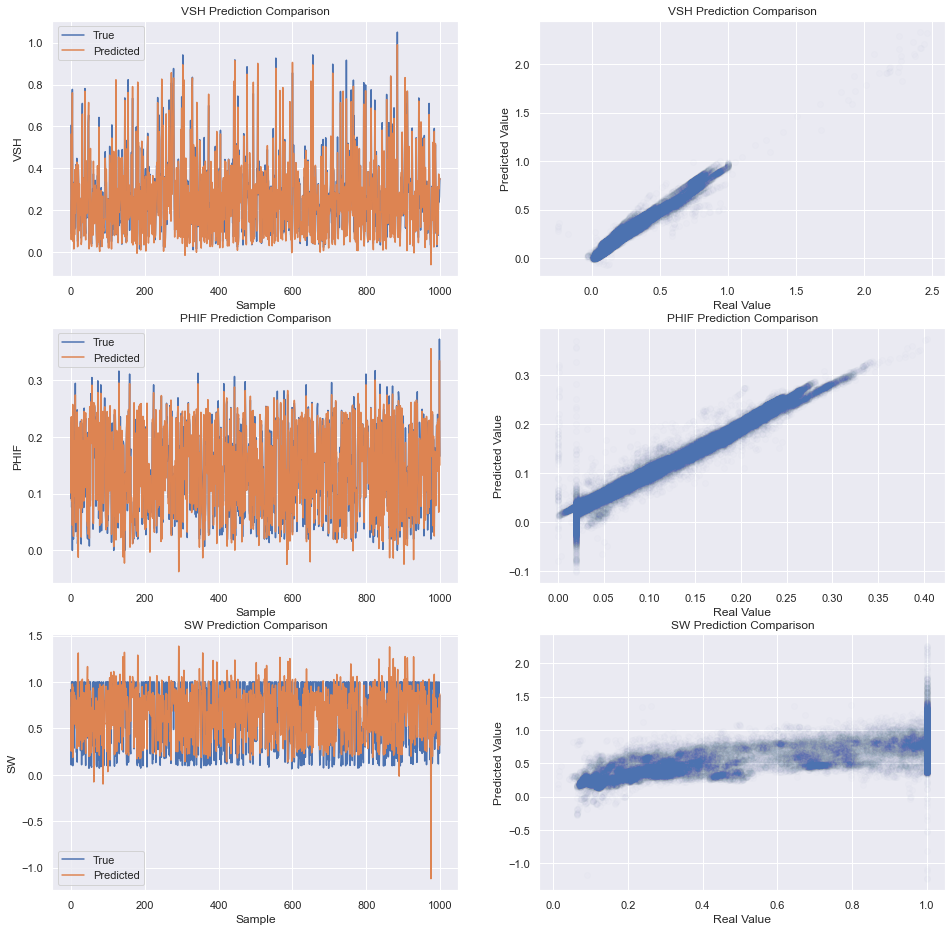

In [459]:
result_plot(y_pred, y_train.to_numpy(), n_points=1000)

In [460]:
### Lets plot the results for the validation set as well 

RMSE: 0.12019
    VSH   : 0.04093
    PHIF  : 0.01573
    SW    : 0.20351
R^2:  0.8641102136560971
    VSH   : 0.96053
    PHIF  : 0.96213
    SW    : 0.66967


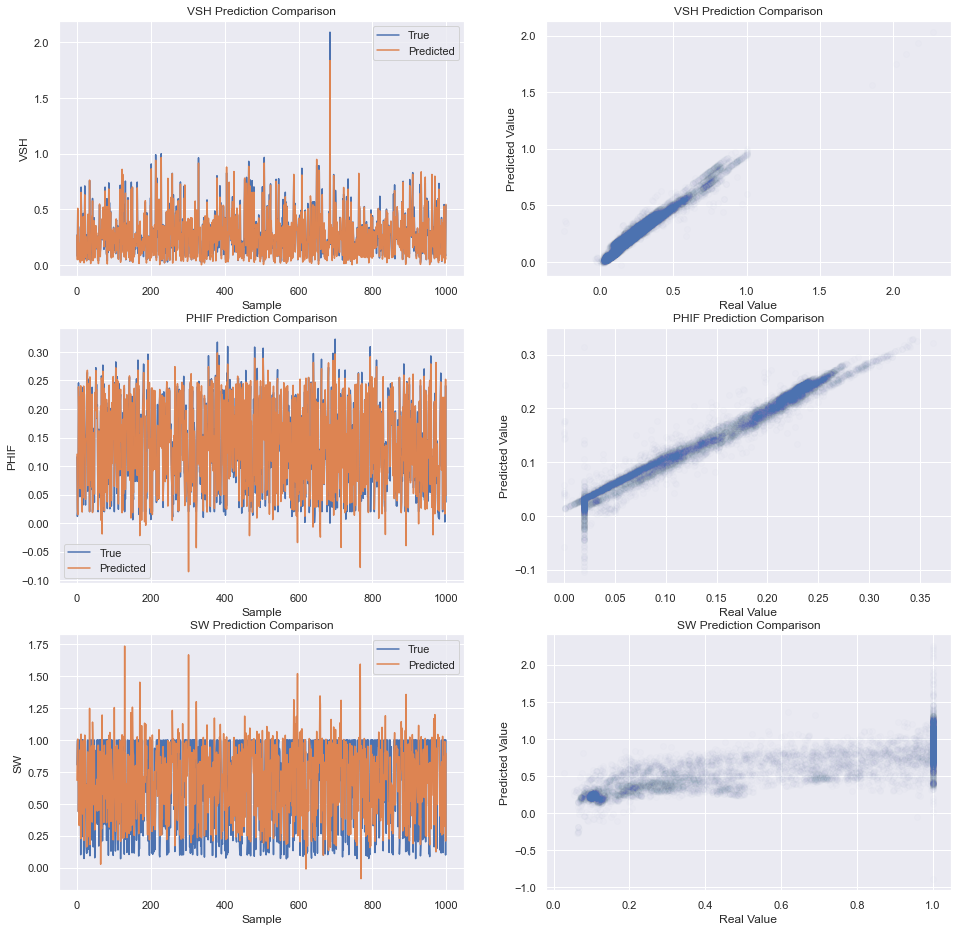

In [461]:
result_plot(y_val_pred, y_val.to_numpy(), n_points=1000)

In [462]:
# Let us explore other plots for the results from the validation set

In [472]:
#er1=abs(y_val['VSH'] - y_val_pred['VSH'])  
#er2=abs(y_val['SW'] - y_val_pred['SW'])
#er3=abs(y_val['PHIF'] - y_val_pred['PHIF'])
   
# A plot of predicted and actual ROP values for different number of neighbors (K-values)
#fig = plt.figure( figsize=(6, 6))
#plt.axis([0, 50, 0, 50])
#plt.scatter(y_val, y_val_pred, c = (er1,er2,er3))
#plt.plot([0, 160],[0, 160], color='black', linewidth=2, linestyle='--')
#plt.ylabel('Predicted ROP') # Predicted values on y axis
#plt.xlabel('Measured ROP') 
#plt.title('K = %s  TrainingR2 = %f  TestR2 = %f'%( training_R2, test_R2))/// """"

### K-Nearest Neighbours

In [475]:
# We would deploy a build a basic model and boost with cross-validation
from sklearn import neighbors
KNN_regressor= neighbors.KNeighborsRegressor(n_neighbors = 5)

In [476]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle = True, random_state=125) #We would employ a 5-fold cross-validation

from sklearn.model_selection import GridSearchCV

param_grid = { 'n_neighbors': [10, 20, 30], 'weights': ['uniform', 'distance'], 'metric':['euclidean','manhattan','minkowski']}
grid = GridSearchCV(KNN_regressor, param_grid=param_grid, cv=cv, verbose=3)

In [477]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END metric=euclidean, n_neighbors=10, weights=uniform;, score=0.976 total time=   0.5s
[CV 2/5] END metric=euclidean, n_neighbors=10, weights=uniform;, score=0.975 total time=   0.4s
[CV 3/5] END metric=euclidean, n_neighbors=10, weights=uniform;, score=0.976 total time=   0.4s
[CV 4/5] END metric=euclidean, n_neighbors=10, weights=uniform;, score=0.976 total time=   0.4s
[CV 5/5] END metric=euclidean, n_neighbors=10, weights=uniform;, score=0.976 total time=   0.4s
[CV 1/5] END metric=euclidean, n_neighbors=10, weights=distance;, score=0.981 total time=   0.4s
[CV 2/5] END metric=euclidean, n_neighbors=10, weights=distance;, score=0.981 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=10, weights=distance;, score=0.981 total time=   0.4s
[CV 4/5] END metric=euclidean, n_neighbors=10, weights=distance;, score=0.981 total time=   0.4s
[CV 5/5] END metric=euclidean, n_neighbors=10, weights=distance;, score

[CV 1/5] END metric=minkowski, n_neighbors=30, weights=distance;, score=0.970 total time=   0.7s
[CV 2/5] END metric=minkowski, n_neighbors=30, weights=distance;, score=0.969 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=30, weights=distance;, score=0.969 total time=   0.7s
[CV 4/5] END metric=minkowski, n_neighbors=30, weights=distance;, score=0.970 total time=   0.7s
[CV 5/5] END metric=minkowski, n_neighbors=30, weights=distance;, score=0.971 total time=   0.7s


GridSearchCV(cv=KFold(n_splits=5, random_state=125, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [10, 20, 30],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [480]:
KNN_cv_results = pd.DataFrame(grid.cv_results_)

cv_results_slct=KNN_cv_results[['param_n_neighbors','param_weights','param_metric','mean_test_score']] #add mean_test_score to data
cv_results_slct.sort_values(by='mean_test_score', ascending=False).head(5) # ranking the best parameters based on thier scores

param_n_neighbors param_weights param_metric  mean_test_score
7                 10      distance    manhattan         0.983599
13                10      distance    minkowski         0.980667
1                 10      distance    euclidean         0.980667
6                 10       uniform    manhattan         0.979049
9                 20      distance    manhattan         0.977789

In [481]:
# The best is shown below
KNN_best_model=grid.best_estimator_

In [483]:
y_best_model_pred=KNN_best_model.predict(X_train)

In [484]:
y_best_model_val_pred=KNN_best_model.predict(X_val)

RMSE: 0.00000
    VSH   : 0.00000
    PHIF  : 0.00000
    SW    : 0.00000
R^2:  1.0
    VSH   : 1.00000
    PHIF  : 1.00000
    SW    : 1.00000


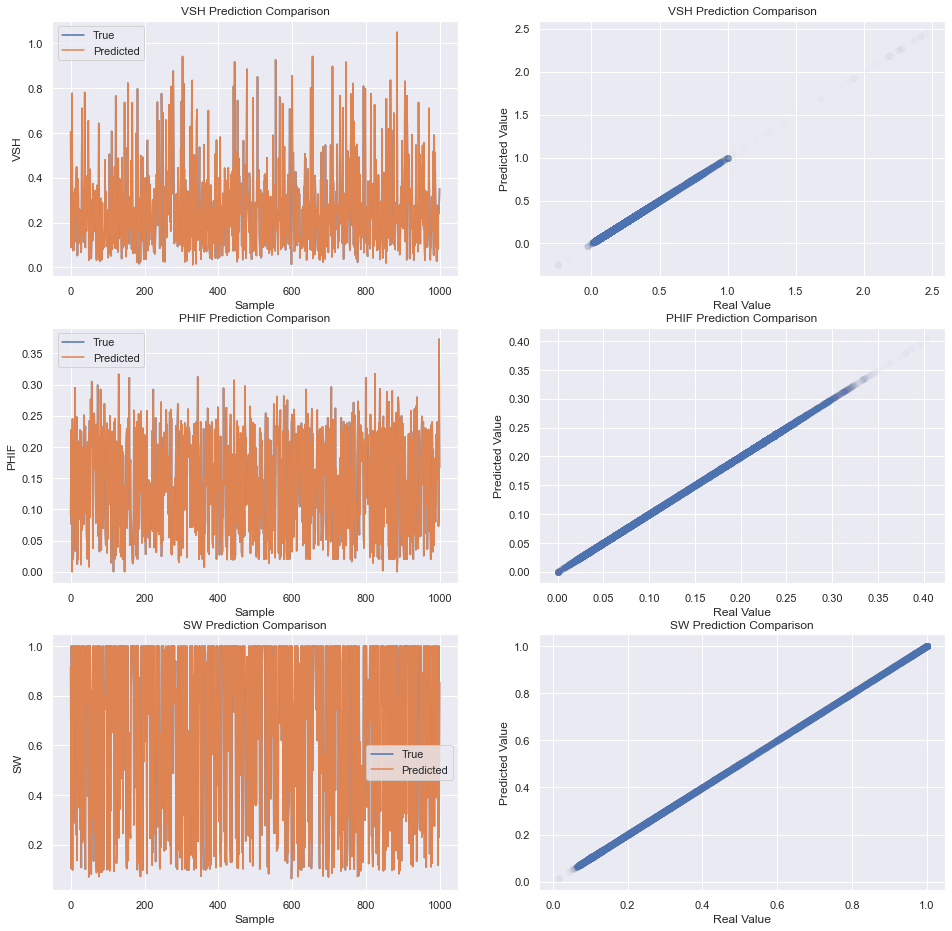

In [485]:
# Now lets see the performance of the best estimator
result_plot(y_best_model_pred, y_train.to_numpy(), n_points=1000)

RMSE: 0.03527
    VSH   : 0.01928
    PHIF  : 0.00607
    SW    : 0.05765
R^2:  0.9863641850915187
    VSH   : 0.99125
    PHIF  : 0.99435
    SW    : 0.97349


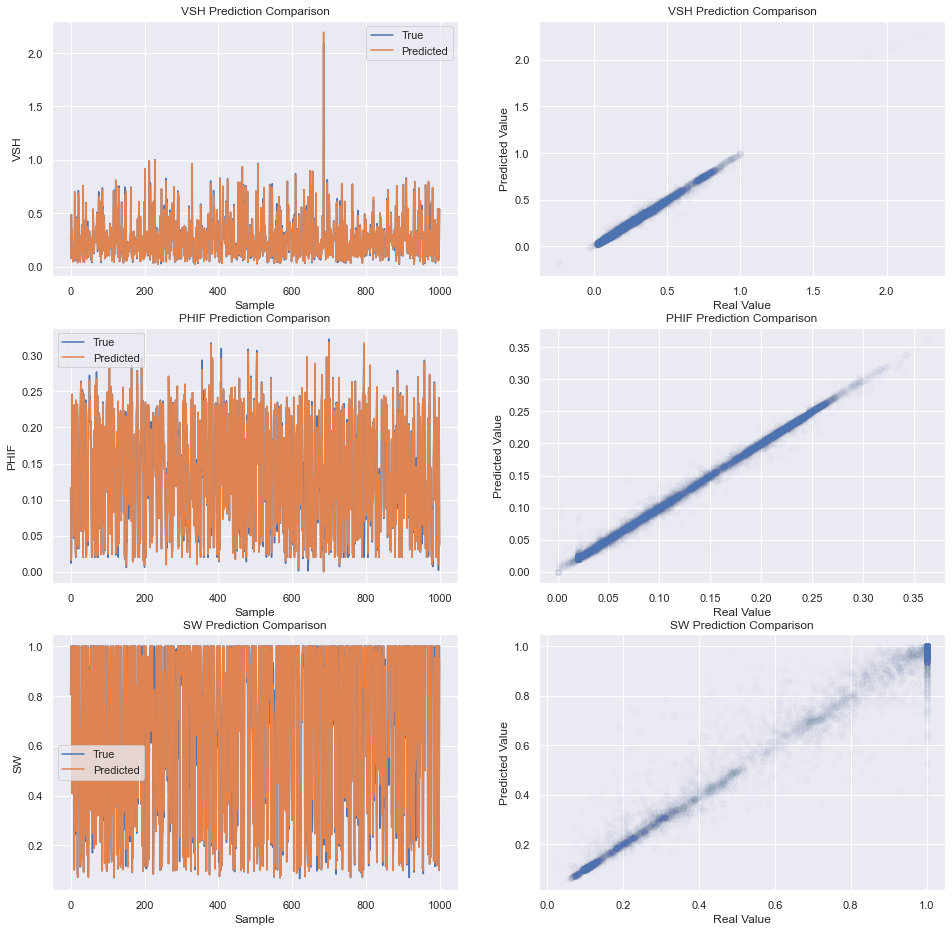

In [486]:
result_plot(y_best_model_val_pred, y_val.to_numpy(), n_points=1000)